# Machine Learning for Everybody

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

## Dataset
https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

In [2]:
cols = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv('magic+gamma+telescope/magic04.data', header=None, names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

### Classification problem

In [3]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [4]:
#One hot encoding is required for the class column output
df["class"] = df["class"].map({"g": 1, "h": 0})

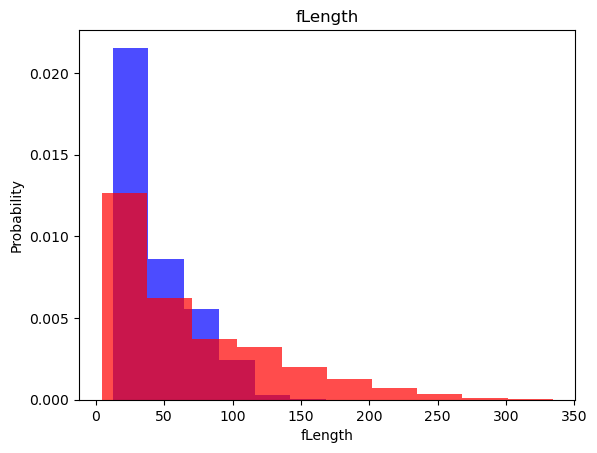

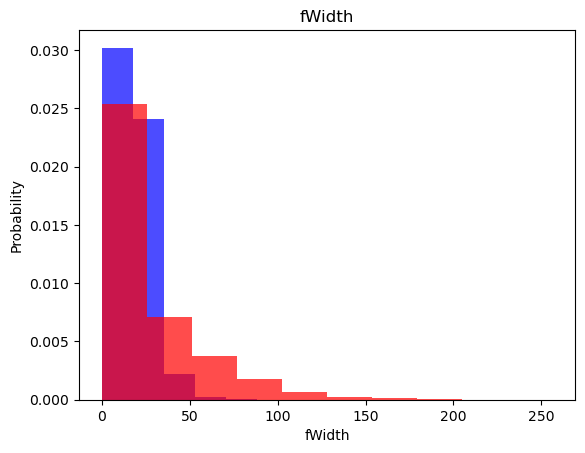

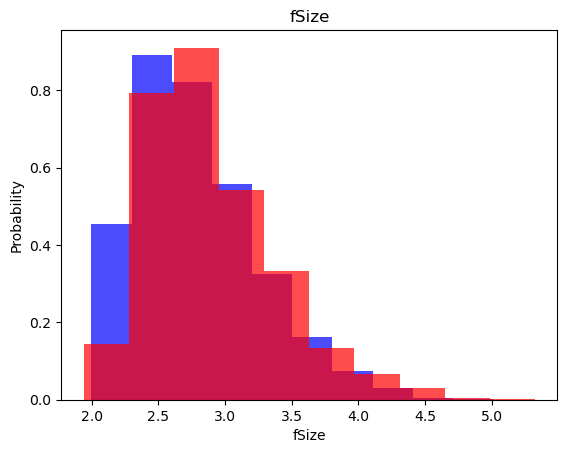

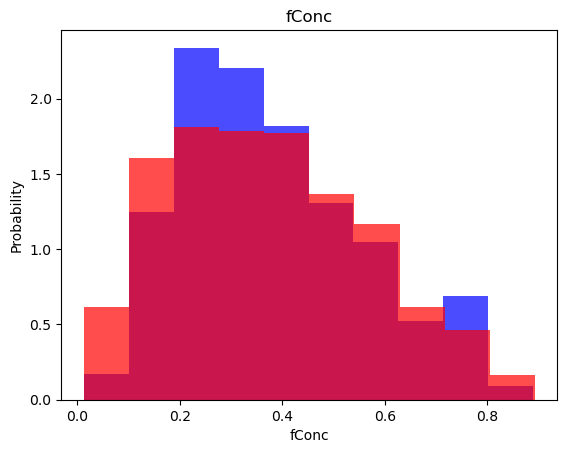

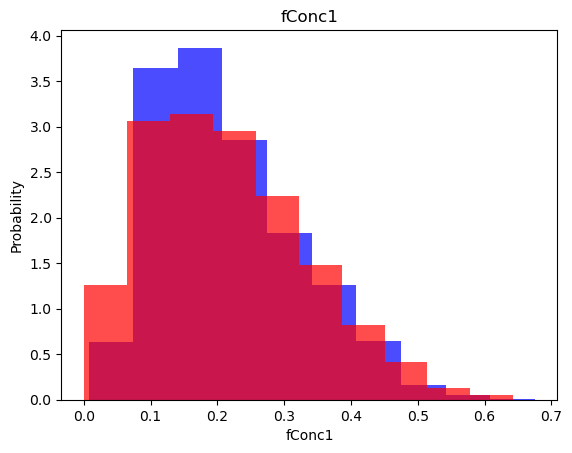

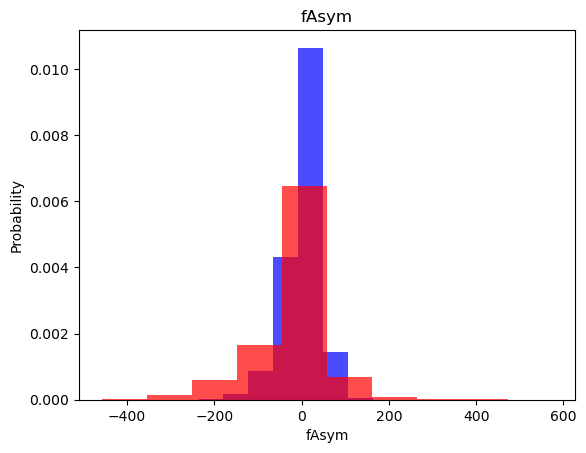

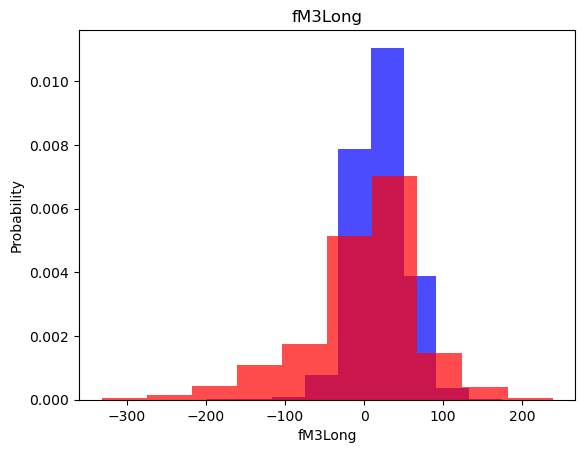

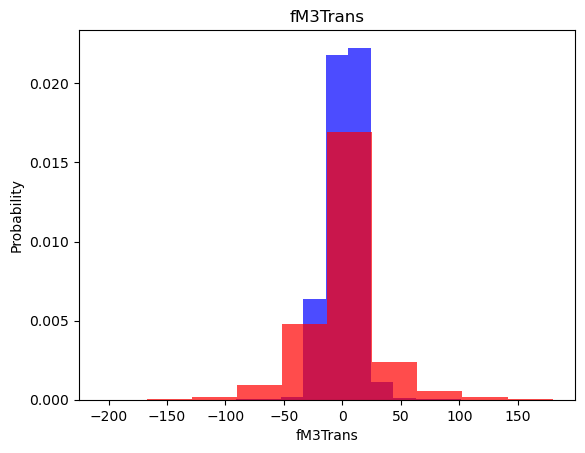

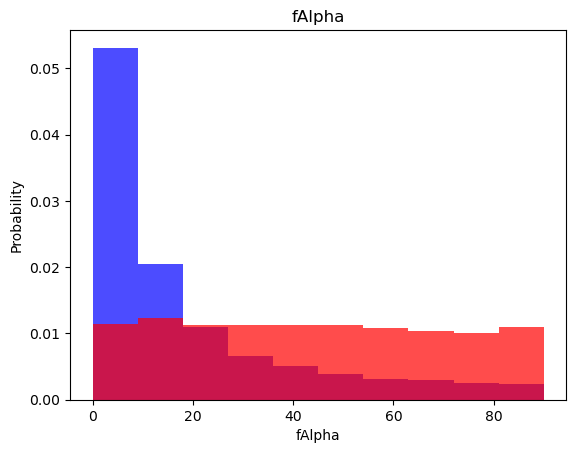

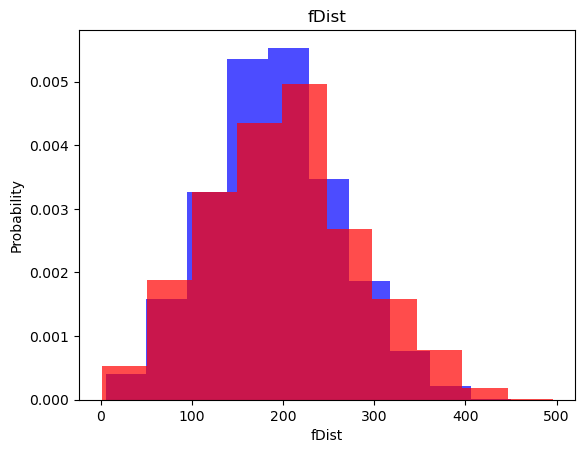

In [5]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label], color='blue', alpha=0.7, label="gamma",density=True)
    plt.hist(df[df["class"] == 0][label], color='red', alpha=0.7, label="hadron",density=True)
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("Probability")
    plt.show()

## Train, Validation, Test datasets

In [6]:
train, valid, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

In [9]:
# Scale our dataset
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    # Oversample if required
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y


In [10]:
len(train), len(valid), len(test)

(11412, 3804, 3804)

In [11]:
len(train[train["class"] == 1]), len(train[train["class"] == 0])
# We can see that the dataset is imbalanced, so we need to balance it

(7379, 4033)

In [12]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [13]:
len(train[train[:, -1] == 1]), len(train[train[:, -1] == 0])
# Now we have a balanced dataset

(7379, 7379)

## KNN
k-nearest neighbors: 
1. for binary classification
2. for cluster problems
3. K common values: 3, 5


In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [31]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
y_pred = knn_model.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73      1259
           1       0.87      0.86      0.86      2545

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



## Naives Bayes
1. Bayes rule: [P(B|A).P(A)]/P(B)
2. y_predicted = argmax  P(Ck)*Productoria[P(Xi|Ck)]

In [34]:
from sklearn.naive_bayes import GaussianNB

In [35]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [36]:
y_pred = nb_model.predict(X_test)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.43      0.51      1259
           1       0.76      0.88      0.81      2545

    accuracy                           0.73      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



## Logistic Regression
Sigmoid function

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [40]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.72      0.68      1259
           1       0.85      0.81      0.83      2545

    accuracy                           0.78      3804
   macro avg       0.75      0.76      0.76      3804
weighted avg       0.79      0.78      0.78      3804



## SVM, suport vector machine


In [41]:
from sklearn.svm import SVC

In [42]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [43]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79      1259
           1       0.90      0.89      0.89      2545

    accuracy                           0.86      3804
   macro avg       0.84      0.85      0.84      3804
weighted avg       0.86      0.86      0.86      3804



## Neural Networks
We have different types of layers:
1. Dense Layer (Lineal): The one that we use it in the next example
2. Convolutional 
3. Recurrent
4. Transformer

In [1]:
import tensorflow as tf

In [2]:
tf.config.experimental.set_visible_devices([], 'GPU')

In [16]:
def plot_history(history):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary cross-entropy')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)
    
    plt.show()



In [17]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nm_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)), # 10 features
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    nm_model.compile(optimizer=tf.keras.optimizers.legacy.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
    history = nm_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
    return nm_model, history

Training model with 16 nodes, 0 dropout, 0.01 learning rate, 32 batch size


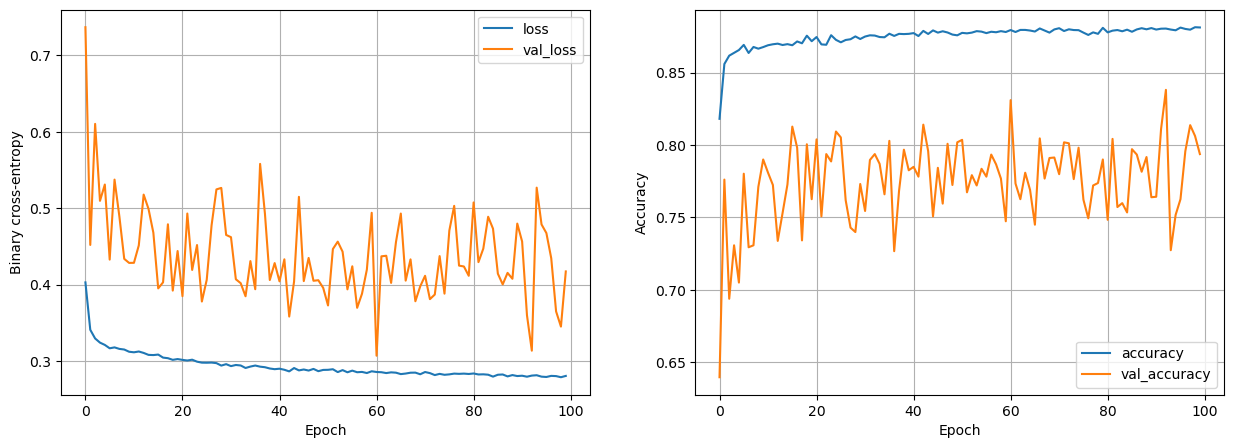

119/119 [==============================] - 0s 506us/step - loss: 0.3523 - accuracy: 0.8575
Training model with 16 nodes, 0 dropout, 0.01 learning rate, 64 batch size


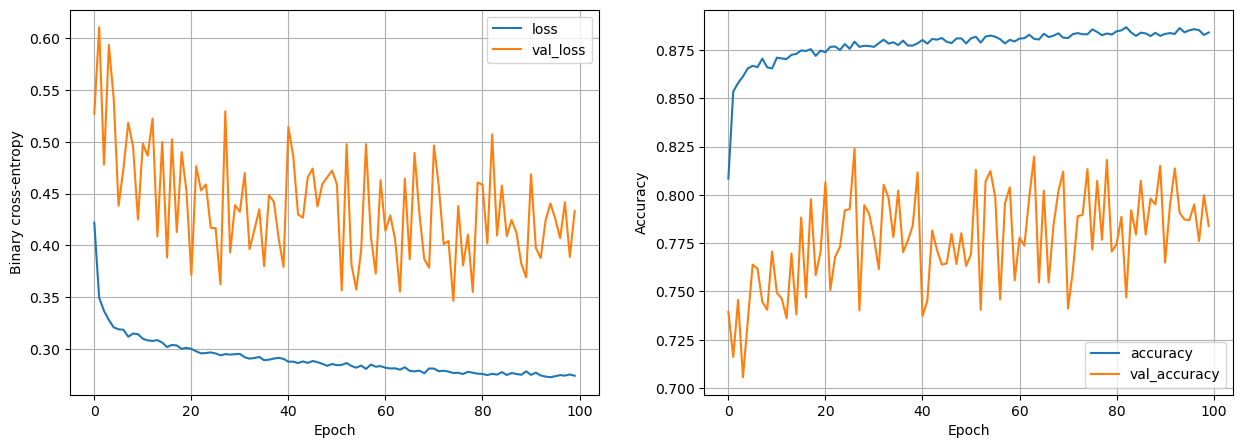

119/119 [==============================] - 0s 280us/step - loss: 0.3439 - accuracy: 0.8641
Training model with 16 nodes, 0 dropout, 0.01 learning rate, 128 batch size


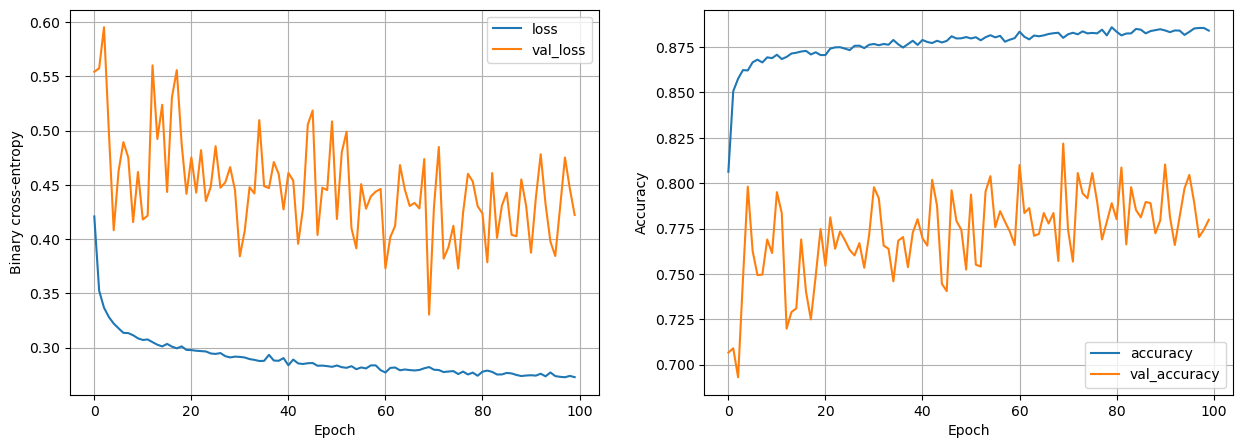

119/119 [==============================] - 0s 273us/step - loss: 0.3584 - accuracy: 0.8580
Training model with 16 nodes, 0 dropout, 0.005 learning rate, 32 batch size


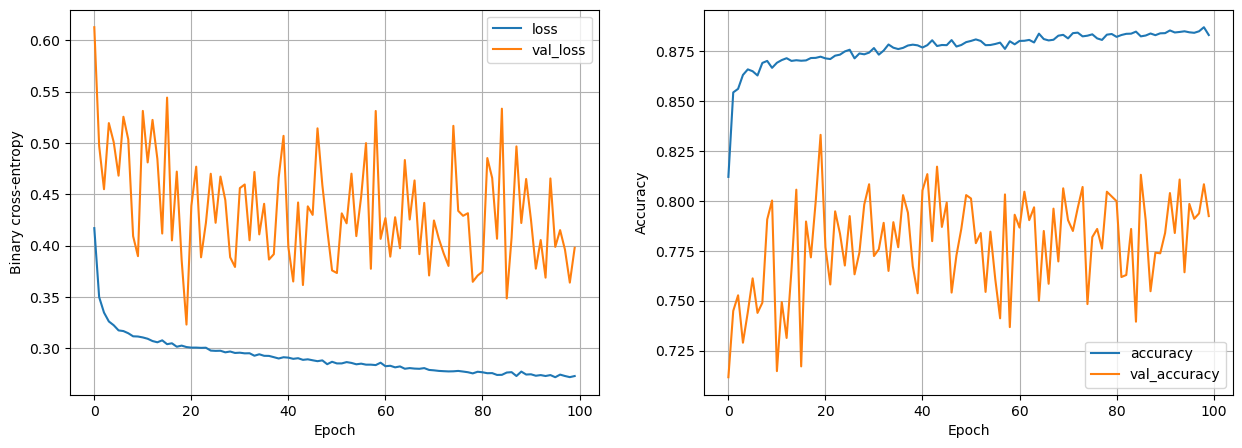

119/119 [==============================] - 0s 493us/step - loss: 0.3481 - accuracy: 0.8607
Training model with 16 nodes, 0 dropout, 0.005 learning rate, 64 batch size


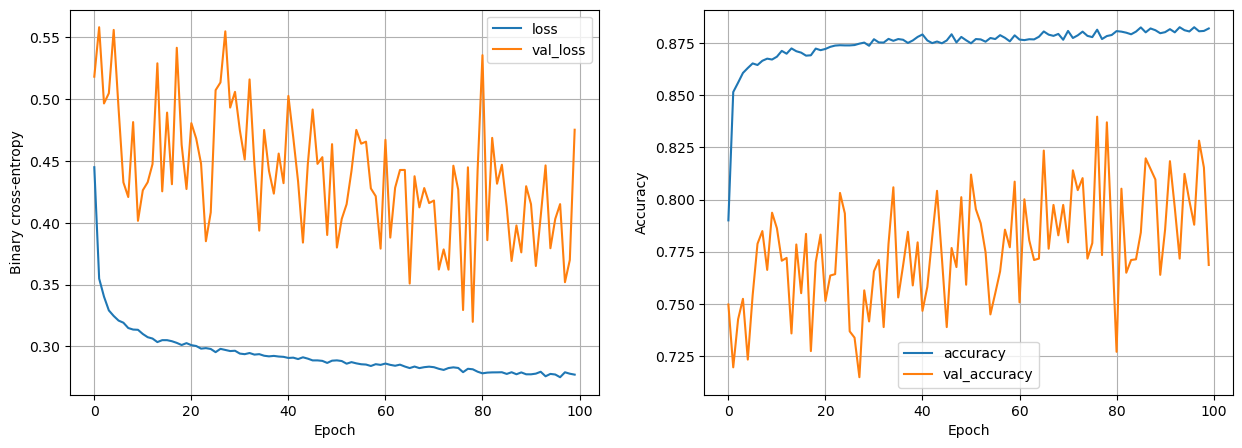

119/119 [==============================] - 0s 298us/step - loss: 0.3552 - accuracy: 0.8654
Training model with 16 nodes, 0 dropout, 0.005 learning rate, 128 batch size


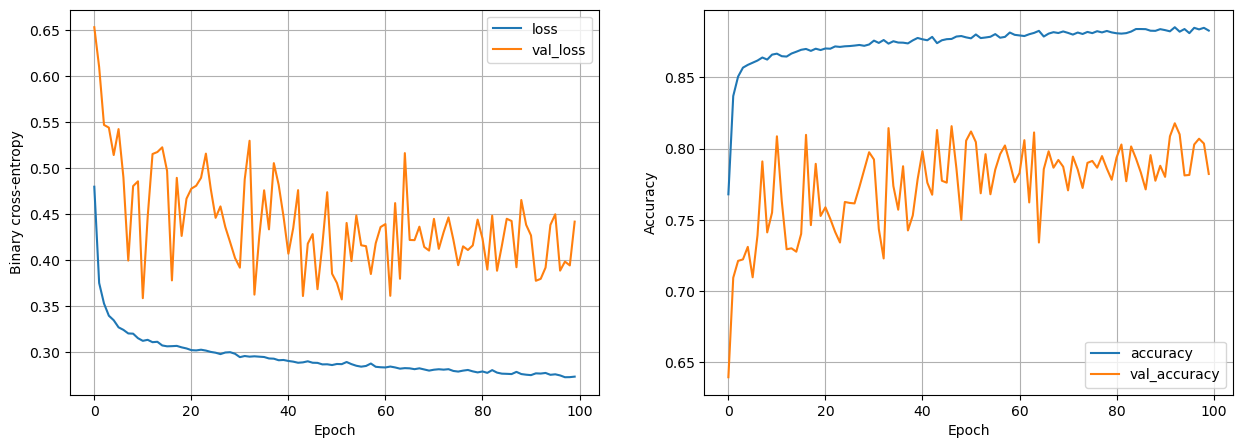

119/119 [==============================] - 0s 295us/step - loss: 0.3511 - accuracy: 0.8604
Training model with 16 nodes, 0 dropout, 0.001 learning rate, 32 batch size


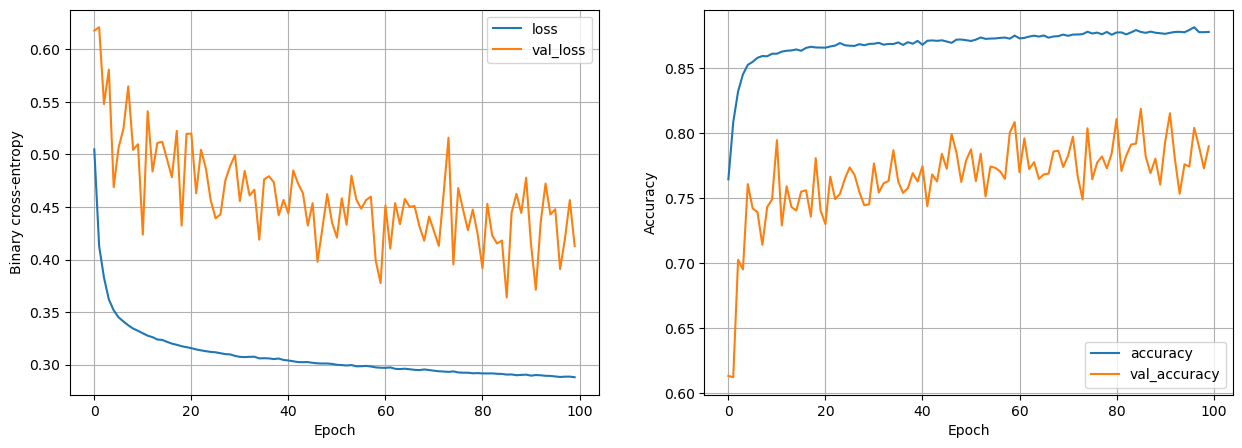

119/119 [==============================] - 0s 294us/step - loss: 0.3493 - accuracy: 0.8617
Training model with 16 nodes, 0 dropout, 0.001 learning rate, 64 batch size


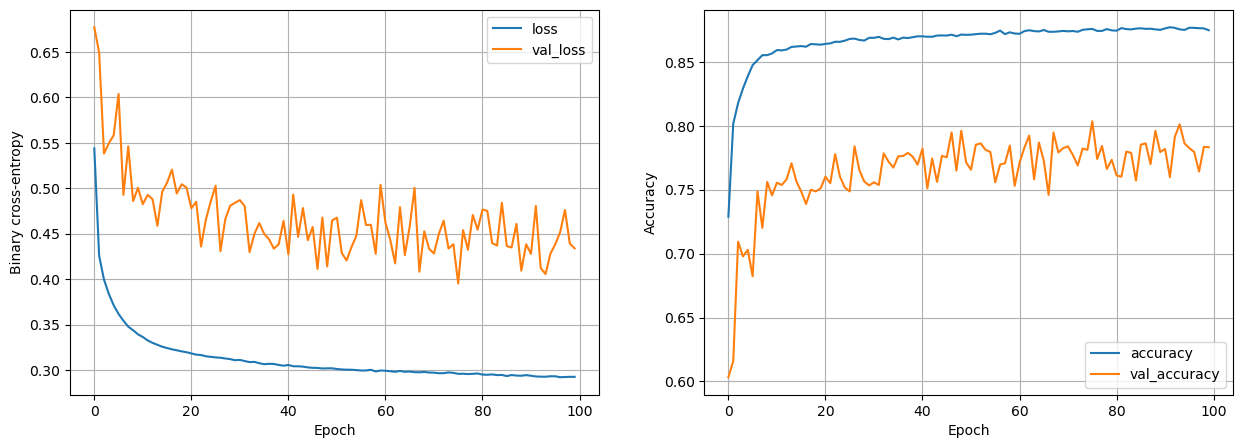

119/119 [==============================] - 0s 306us/step - loss: 0.3464 - accuracy: 0.8594
Training model with 16 nodes, 0 dropout, 0.001 learning rate, 128 batch size


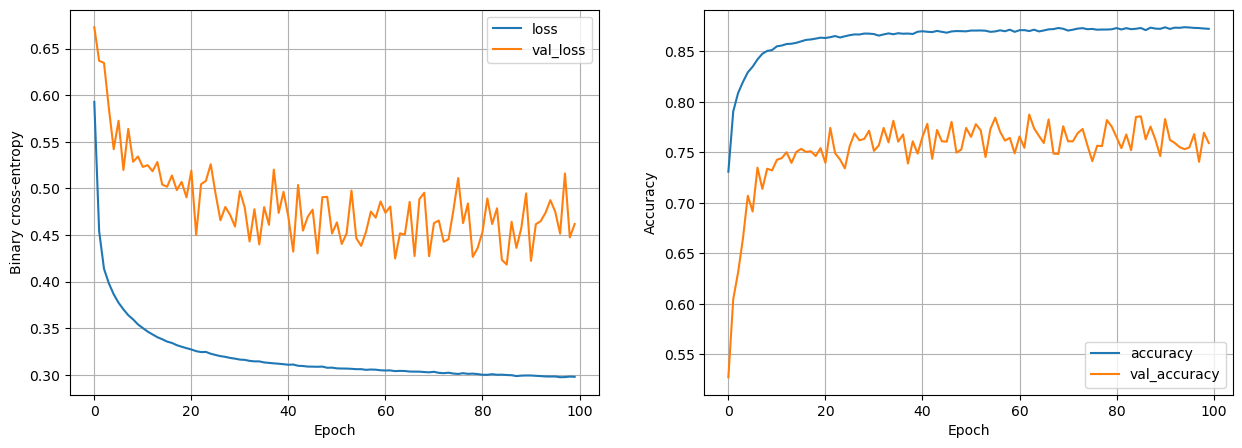

119/119 [==============================] - 0s 281us/step - loss: 0.3410 - accuracy: 0.8638
Training model with 16 nodes, 0.2 dropout, 0.01 learning rate, 32 batch size


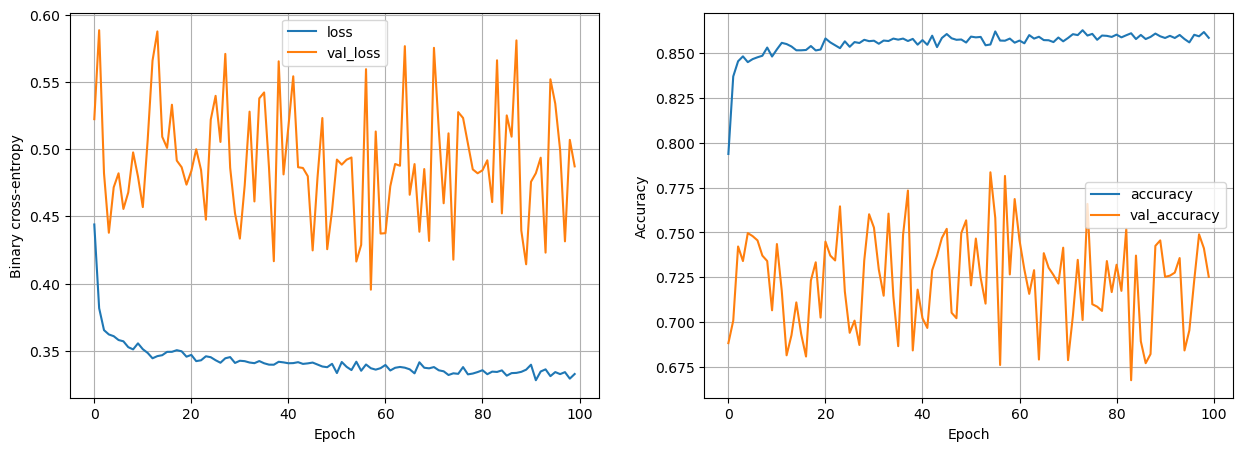

119/119 [==============================] - 0s 302us/step - loss: 0.3377 - accuracy: 0.8691
Training model with 16 nodes, 0.2 dropout, 0.01 learning rate, 64 batch size


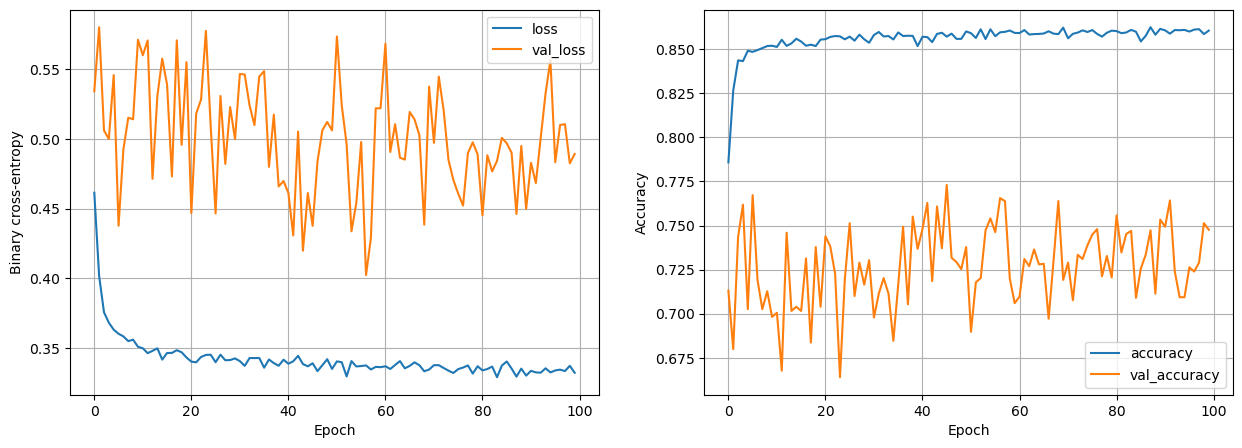

119/119 [==============================] - 0s 299us/step - loss: 0.3423 - accuracy: 0.8623
Training model with 16 nodes, 0.2 dropout, 0.01 learning rate, 128 batch size


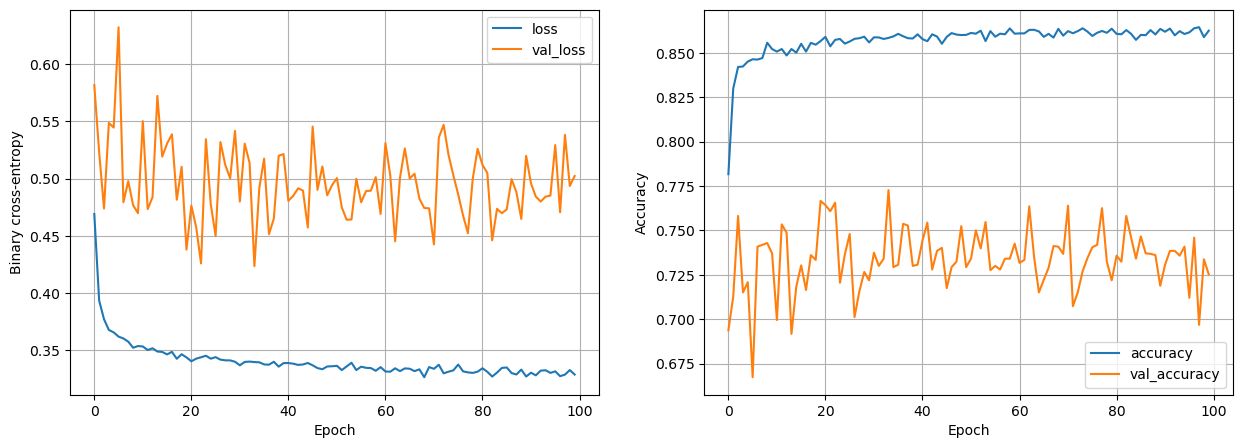

119/119 [==============================] - 0s 280us/step - loss: 0.3371 - accuracy: 0.8599
Training model with 16 nodes, 0.2 dropout, 0.005 learning rate, 32 batch size


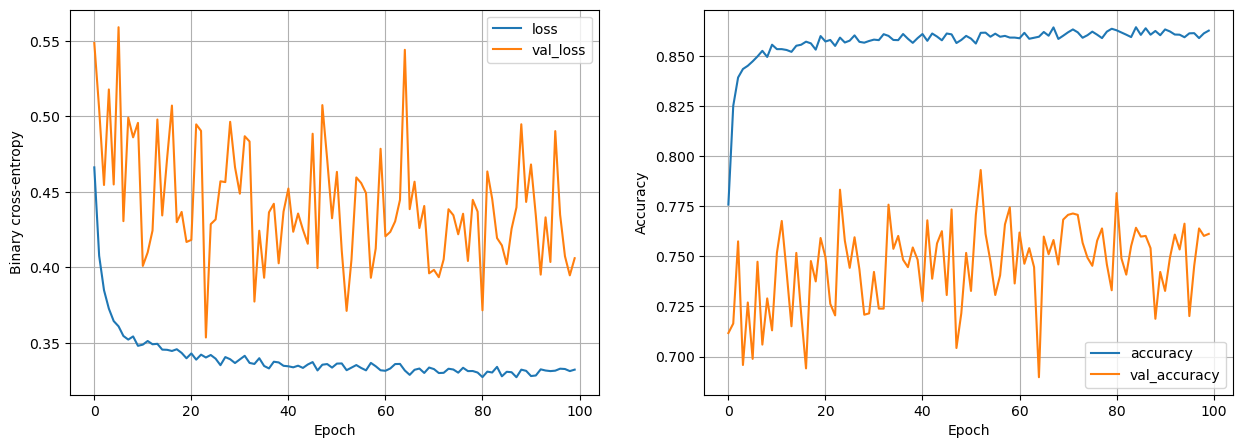

119/119 [==============================] - 0s 310us/step - loss: 0.3379 - accuracy: 0.8612
Training model with 16 nodes, 0.2 dropout, 0.005 learning rate, 64 batch size


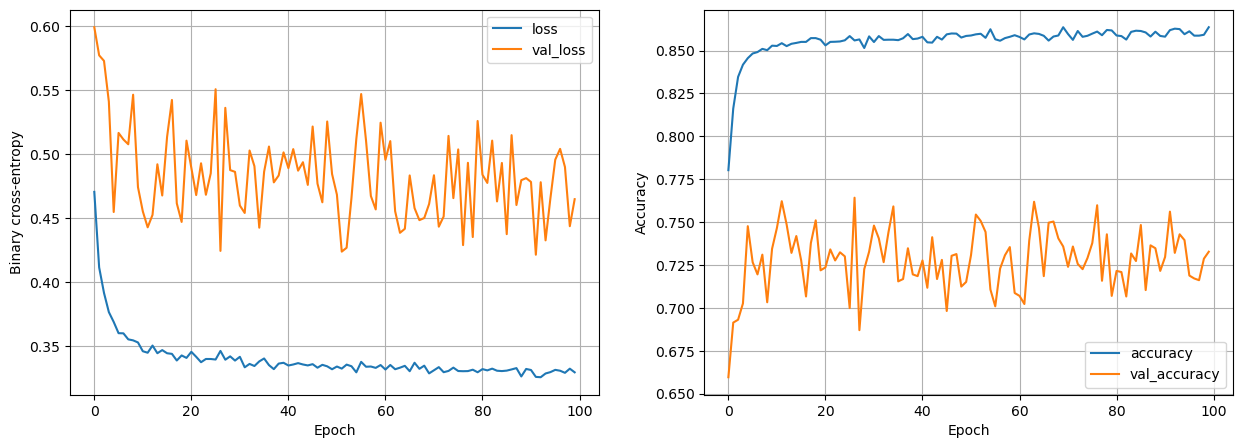

119/119 [==============================] - 0s 280us/step - loss: 0.3335 - accuracy: 0.8630
Training model with 16 nodes, 0.2 dropout, 0.005 learning rate, 128 batch size


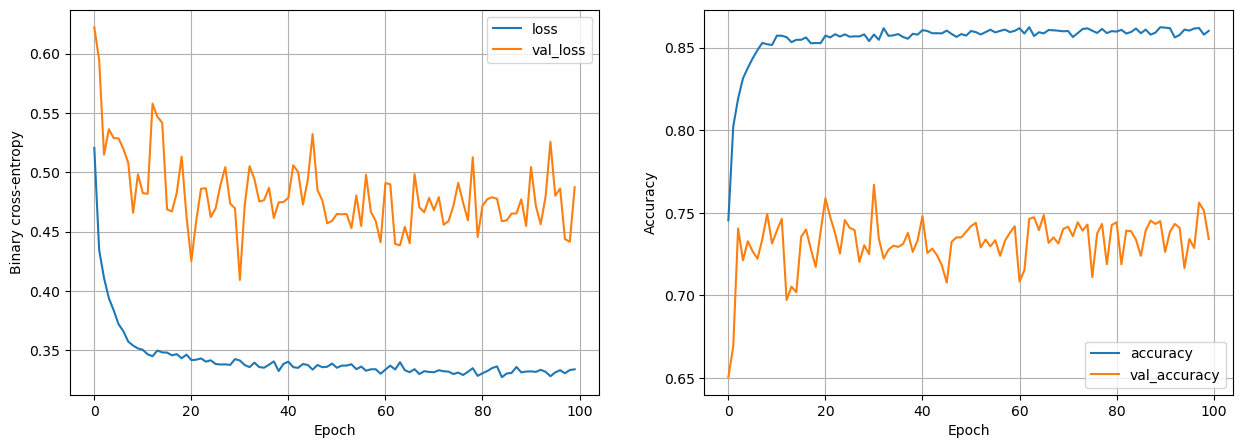

119/119 [==============================] - 0s 287us/step - loss: 0.3397 - accuracy: 0.8628
Training model with 16 nodes, 0.2 dropout, 0.001 learning rate, 32 batch size


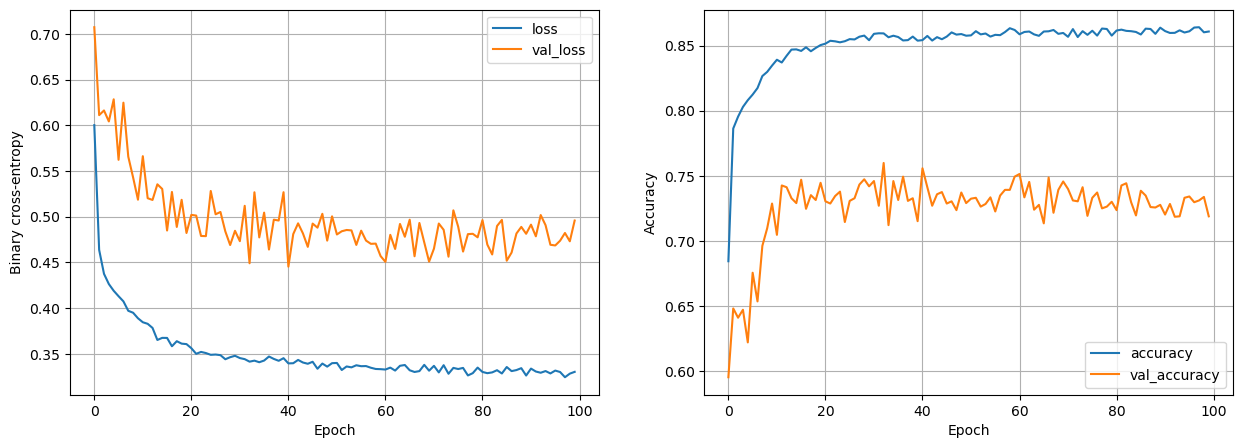

119/119 [==============================] - 0s 280us/step - loss: 0.3345 - accuracy: 0.8573
Training model with 16 nodes, 0.2 dropout, 0.001 learning rate, 64 batch size


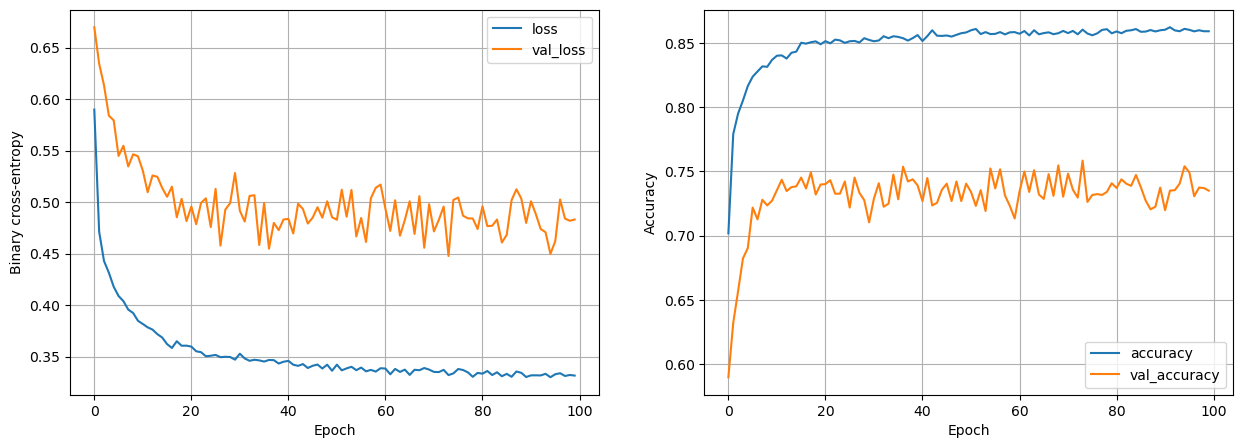

119/119 [==============================] - 0s 279us/step - loss: 0.3363 - accuracy: 0.8604
Training model with 16 nodes, 0.2 dropout, 0.001 learning rate, 128 batch size


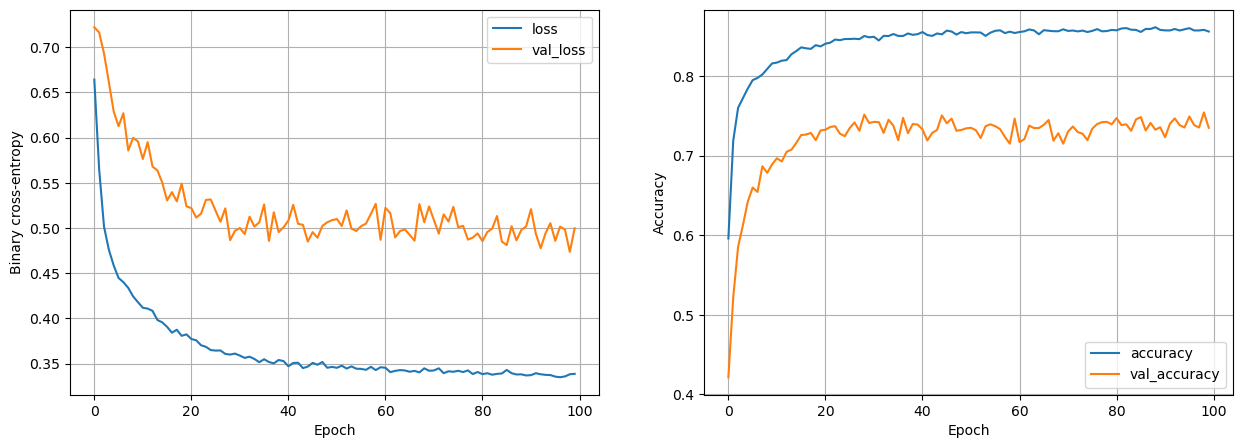

119/119 [==============================] - 0s 279us/step - loss: 0.3436 - accuracy: 0.8562
Training model with 32 nodes, 0 dropout, 0.01 learning rate, 32 batch size


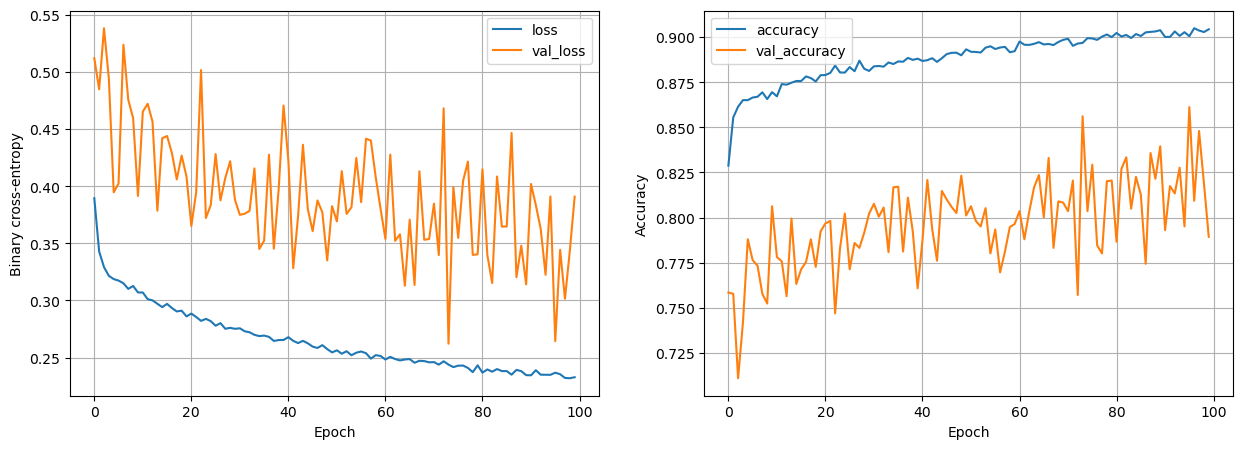

119/119 [==============================] - 0s 292us/step - loss: 0.4482 - accuracy: 0.8433
Training model with 32 nodes, 0 dropout, 0.01 learning rate, 64 batch size


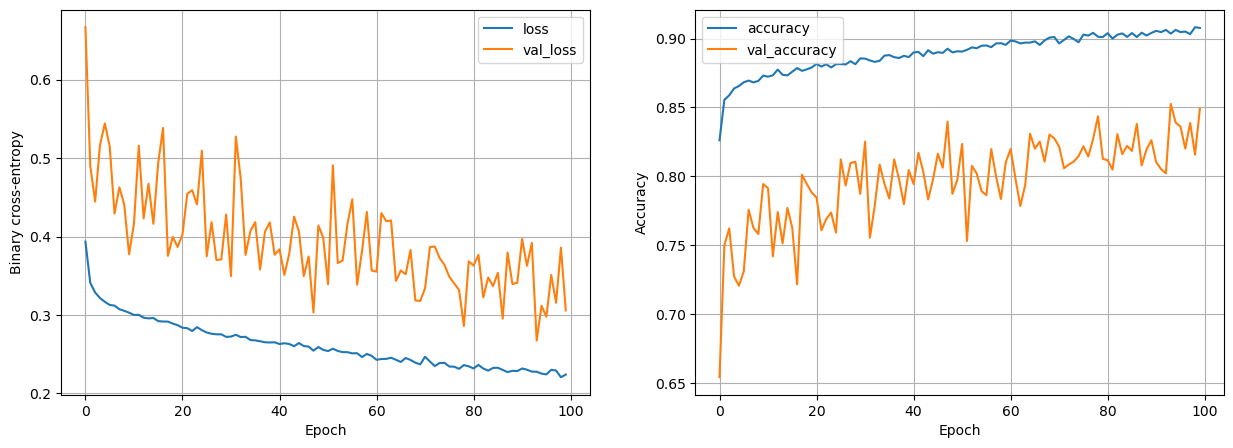

119/119 [==============================] - 0s 302us/step - loss: 0.4842 - accuracy: 0.8502
Training model with 32 nodes, 0 dropout, 0.01 learning rate, 128 batch size


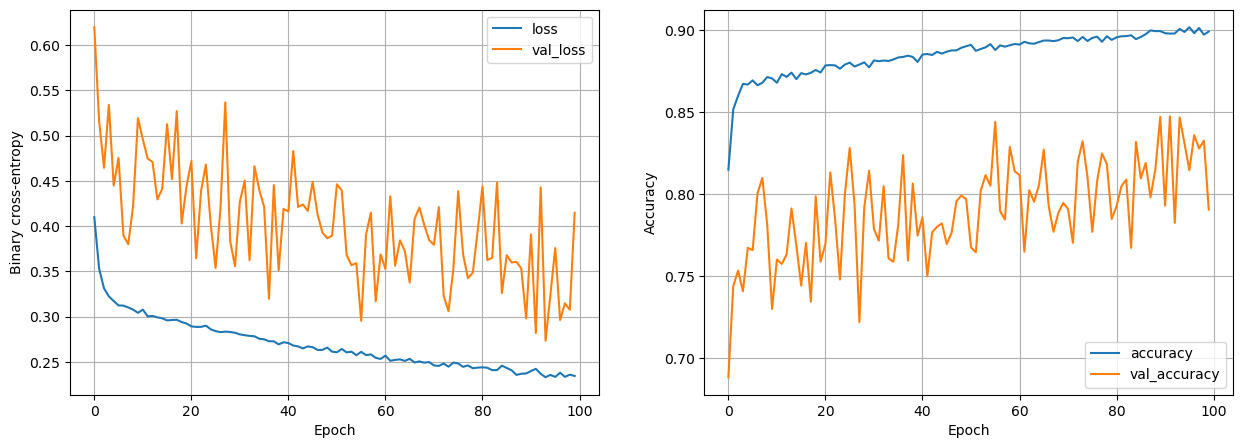

119/119 [==============================] - 0s 282us/step - loss: 0.4514 - accuracy: 0.8625
Training model with 32 nodes, 0 dropout, 0.005 learning rate, 32 batch size


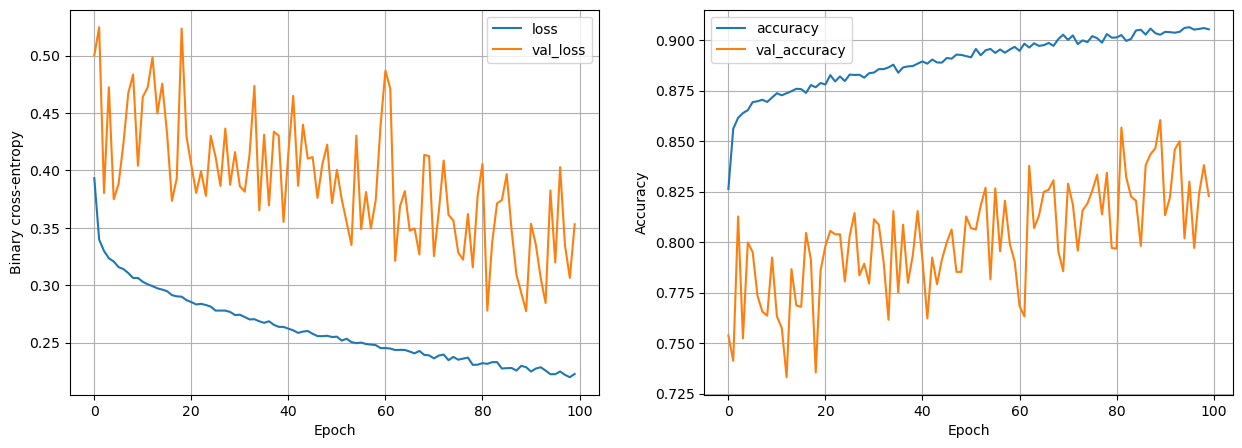

119/119 [==============================] - 0s 281us/step - loss: 0.4881 - accuracy: 0.8559
Training model with 32 nodes, 0 dropout, 0.005 learning rate, 64 batch size


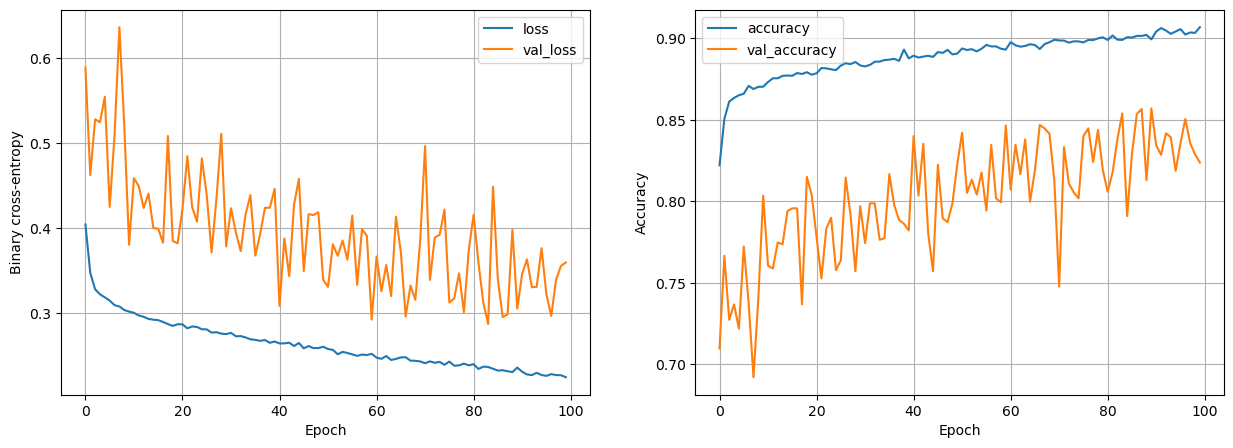

119/119 [==============================] - 0s 297us/step - loss: 0.3986 - accuracy: 0.8630
Training model with 32 nodes, 0 dropout, 0.005 learning rate, 128 batch size


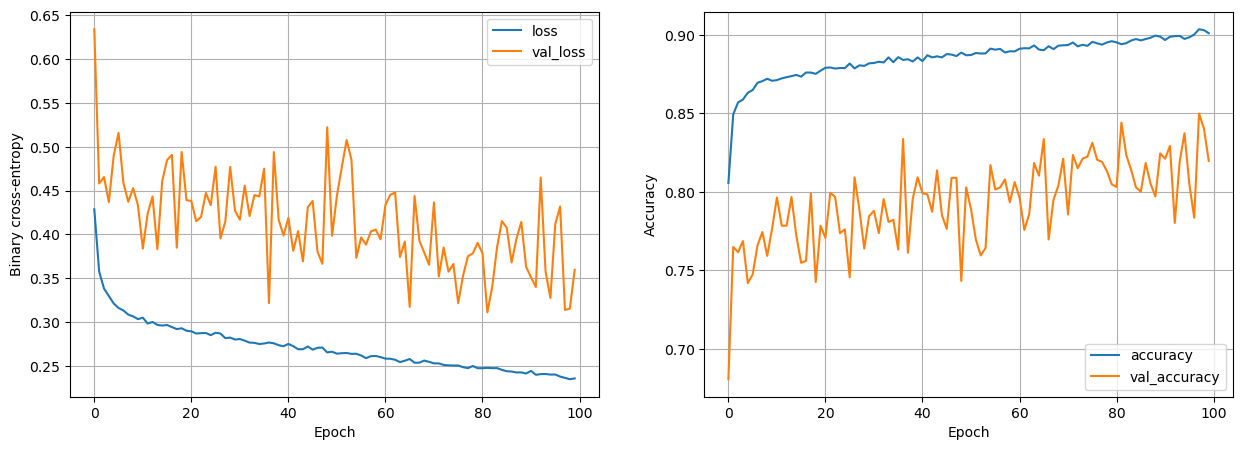

119/119 [==============================] - 0s 282us/step - loss: 0.3828 - accuracy: 0.8641
Training model with 32 nodes, 0 dropout, 0.001 learning rate, 32 batch size


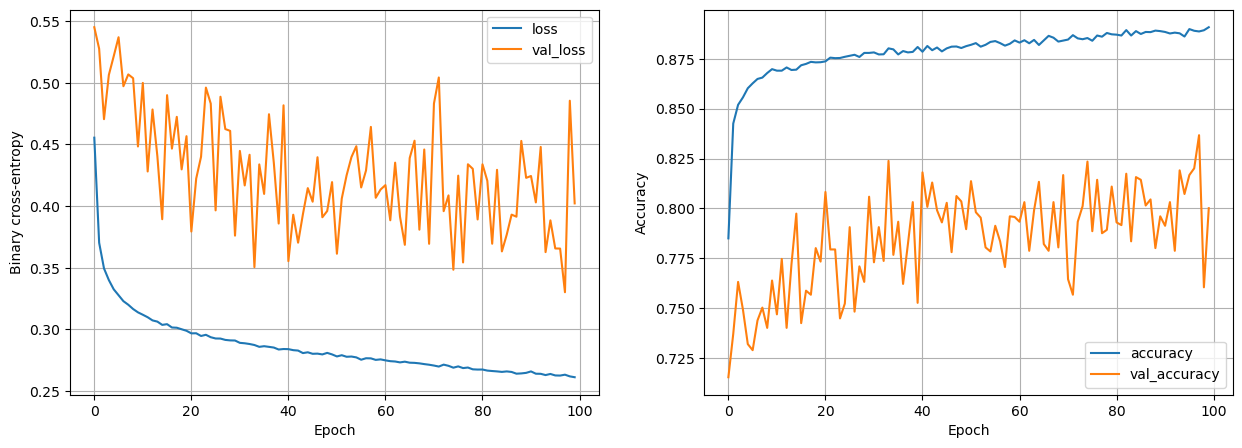

119/119 [==============================] - 0s 286us/step - loss: 0.3442 - accuracy: 0.8657
Training model with 32 nodes, 0 dropout, 0.001 learning rate, 64 batch size


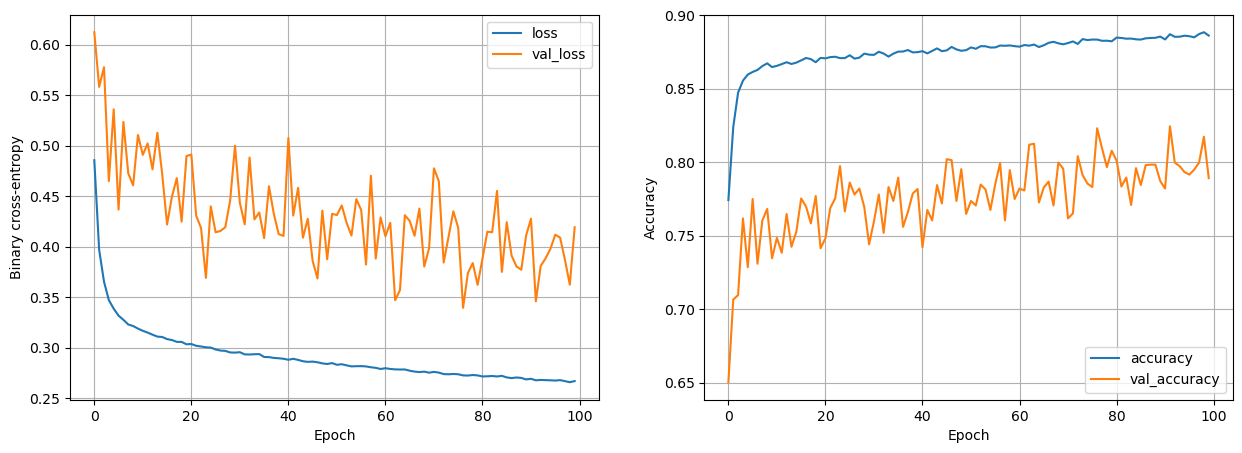

119/119 [==============================] - 0s 289us/step - loss: 0.3385 - accuracy: 0.8654
Training model with 32 nodes, 0 dropout, 0.001 learning rate, 128 batch size


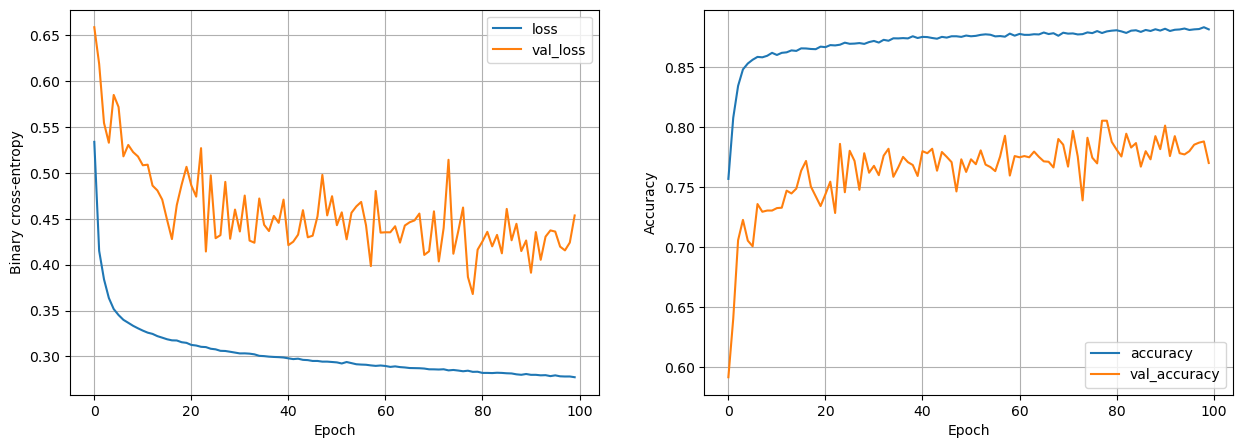

119/119 [==============================] - 0s 276us/step - loss: 0.3381 - accuracy: 0.8662
Training model with 32 nodes, 0.2 dropout, 0.01 learning rate, 32 batch size


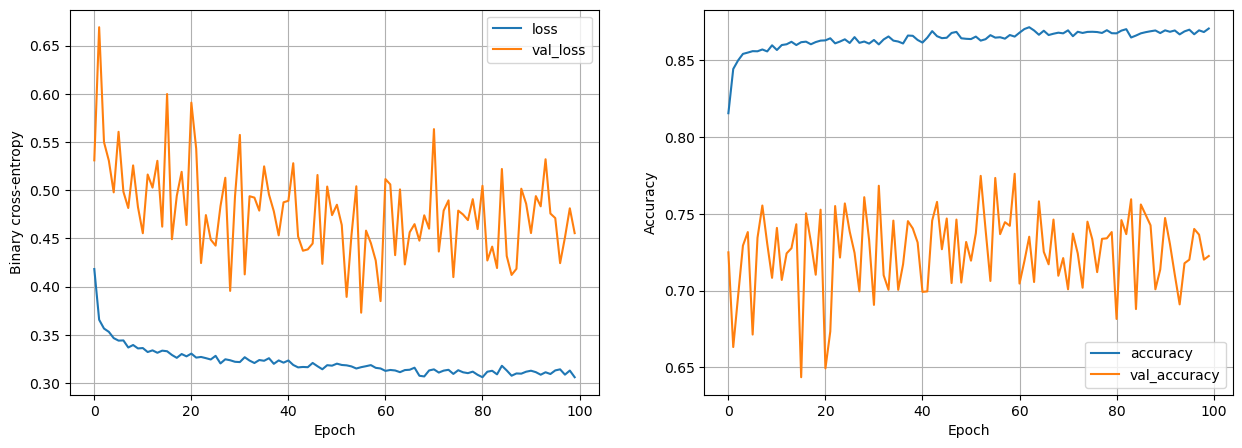

119/119 [==============================] - 0s 292us/step - loss: 0.3446 - accuracy: 0.8612
Training model with 32 nodes, 0.2 dropout, 0.01 learning rate, 64 batch size


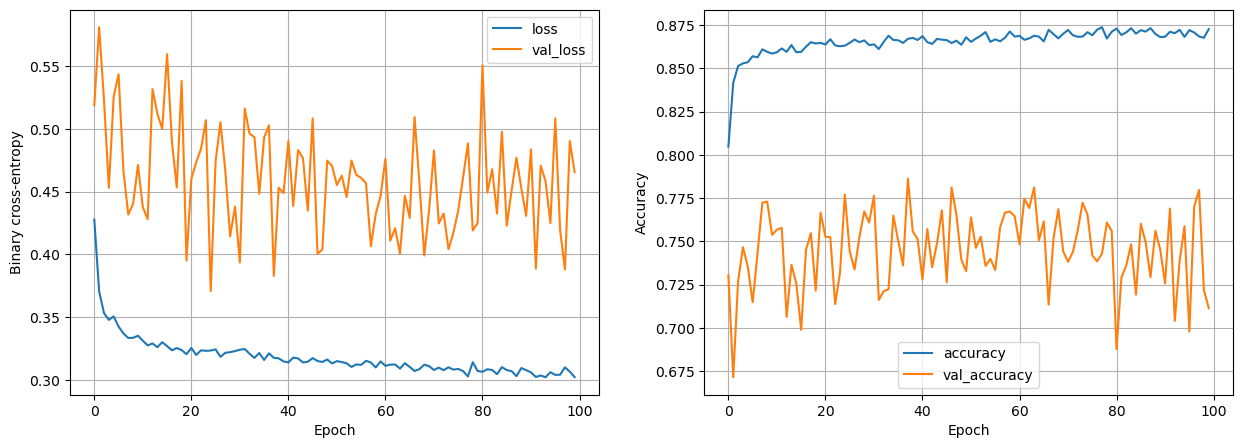

119/119 [==============================] - 0s 286us/step - loss: 0.3401 - accuracy: 0.8583
Training model with 32 nodes, 0.2 dropout, 0.01 learning rate, 128 batch size


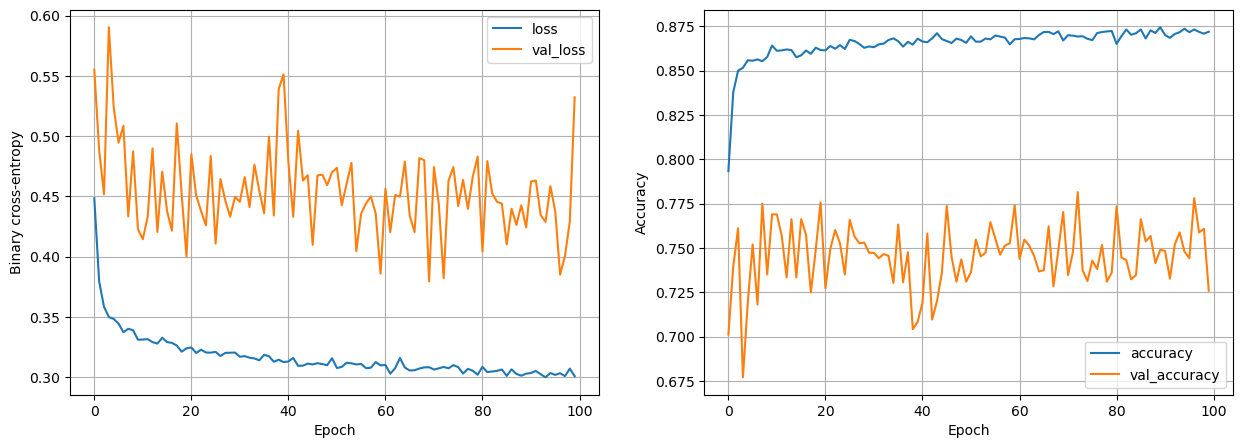

119/119 [==============================] - 0s 295us/step - loss: 0.3409 - accuracy: 0.8672
Training model with 32 nodes, 0.2 dropout, 0.005 learning rate, 32 batch size


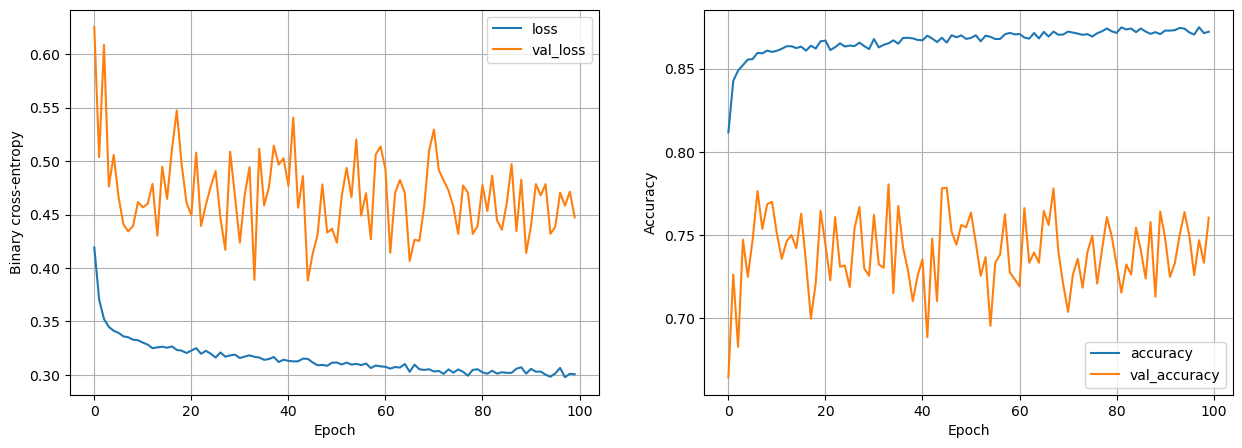

119/119 [==============================] - 0s 286us/step - loss: 0.3325 - accuracy: 0.8665
Training model with 32 nodes, 0.2 dropout, 0.005 learning rate, 64 batch size


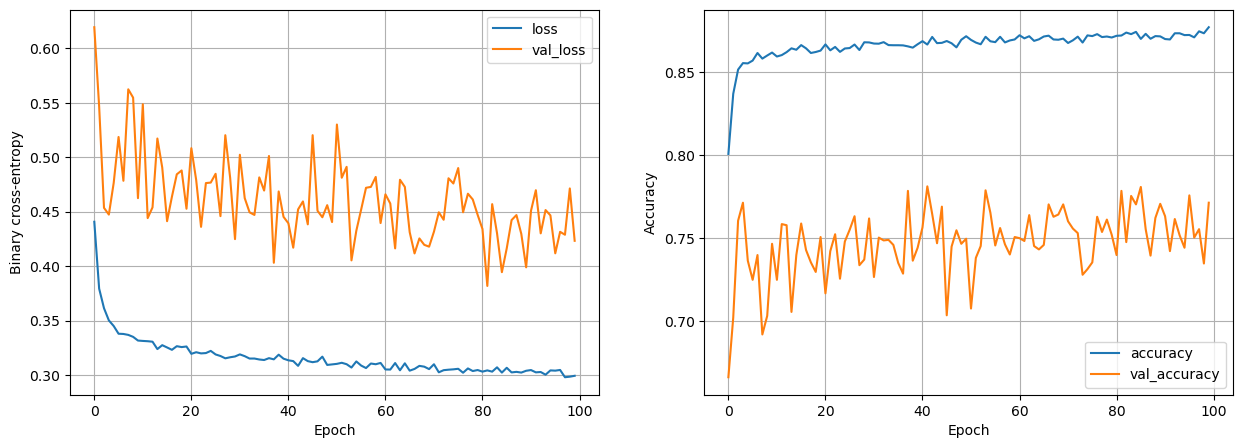

119/119 [==============================] - 0s 285us/step - loss: 0.3303 - accuracy: 0.8717
Training model with 32 nodes, 0.2 dropout, 0.005 learning rate, 128 batch size


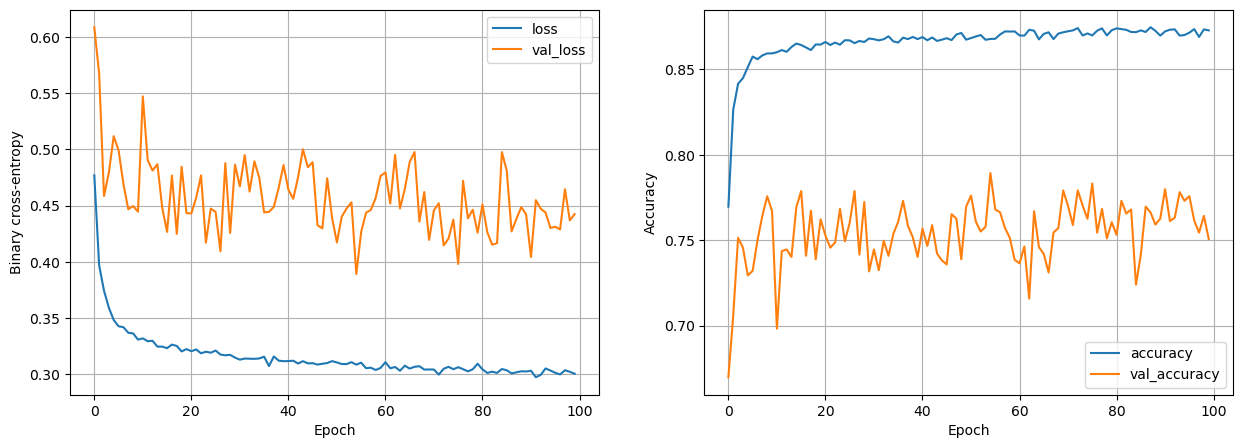

119/119 [==============================] - 0s 284us/step - loss: 0.3269 - accuracy: 0.8625
Training model with 32 nodes, 0.2 dropout, 0.001 learning rate, 32 batch size


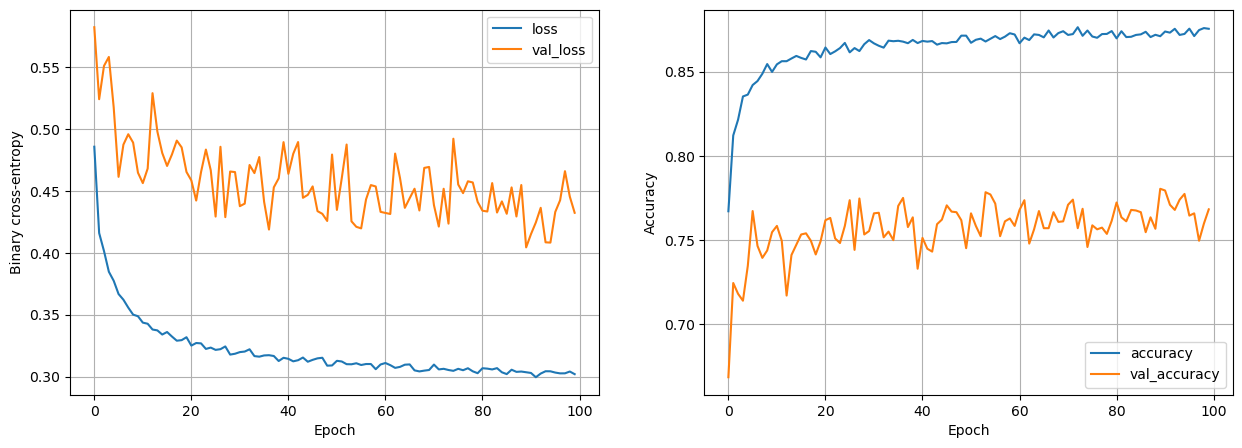

119/119 [==============================] - 0s 283us/step - loss: 0.3245 - accuracy: 0.8686
Training model with 32 nodes, 0.2 dropout, 0.001 learning rate, 64 batch size


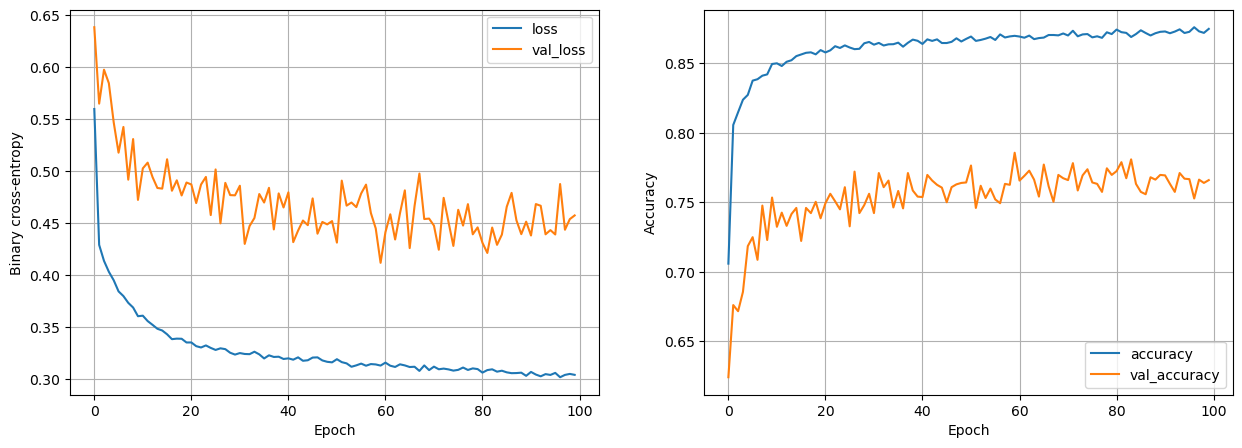

119/119 [==============================] - 0s 298us/step - loss: 0.3249 - accuracy: 0.8701
Training model with 32 nodes, 0.2 dropout, 0.001 learning rate, 128 batch size


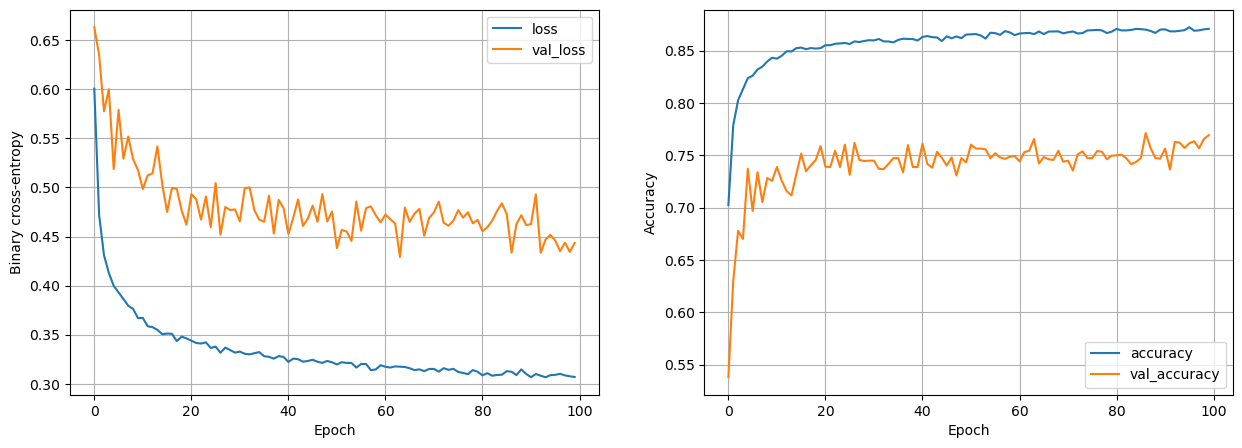

119/119 [==============================] - 0s 300us/step - loss: 0.3293 - accuracy: 0.8625
Training model with 64 nodes, 0 dropout, 0.01 learning rate, 32 batch size


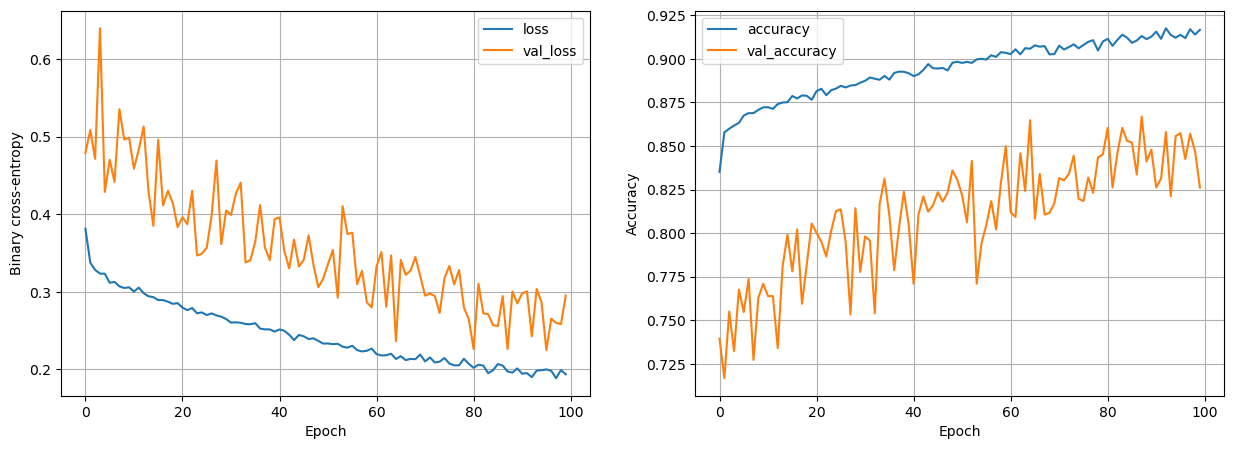

119/119 [==============================] - 0s 486us/step - loss: 0.6612 - accuracy: 0.8460
Training model with 64 nodes, 0 dropout, 0.01 learning rate, 64 batch size


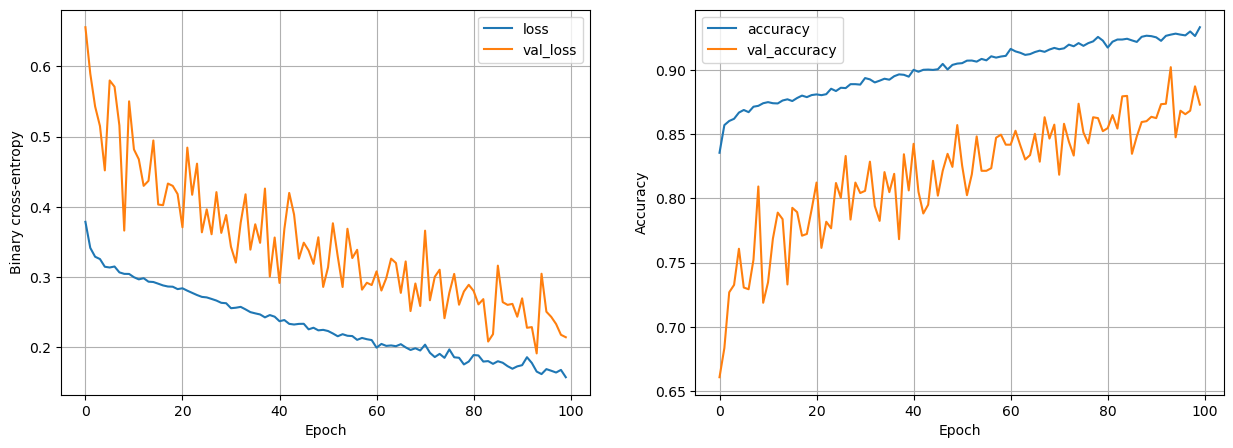

119/119 [==============================] - 0s 308us/step - loss: 0.7446 - accuracy: 0.8478
Training model with 64 nodes, 0 dropout, 0.01 learning rate, 128 batch size


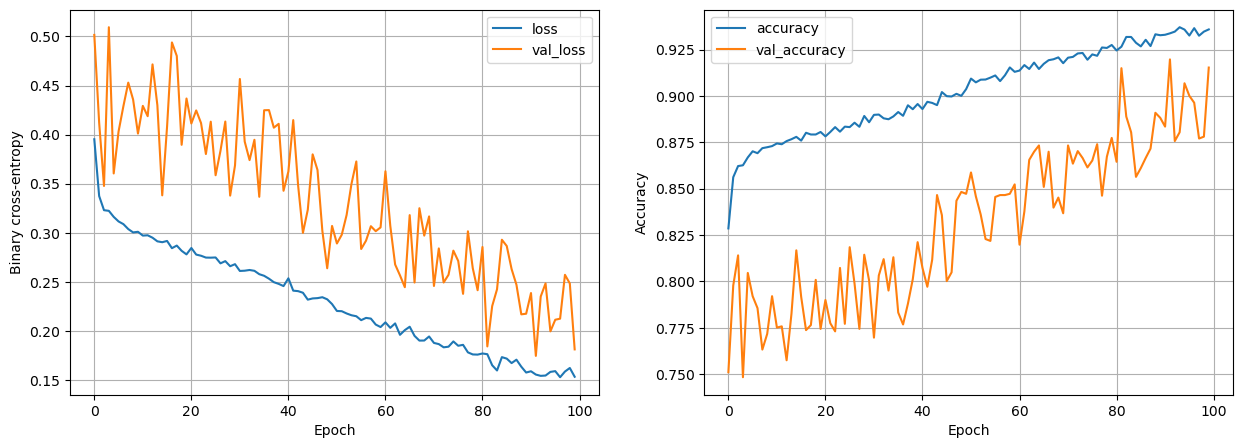

119/119 [==============================] - 0s 288us/step - loss: 0.6918 - accuracy: 0.8465
Training model with 64 nodes, 0 dropout, 0.005 learning rate, 32 batch size


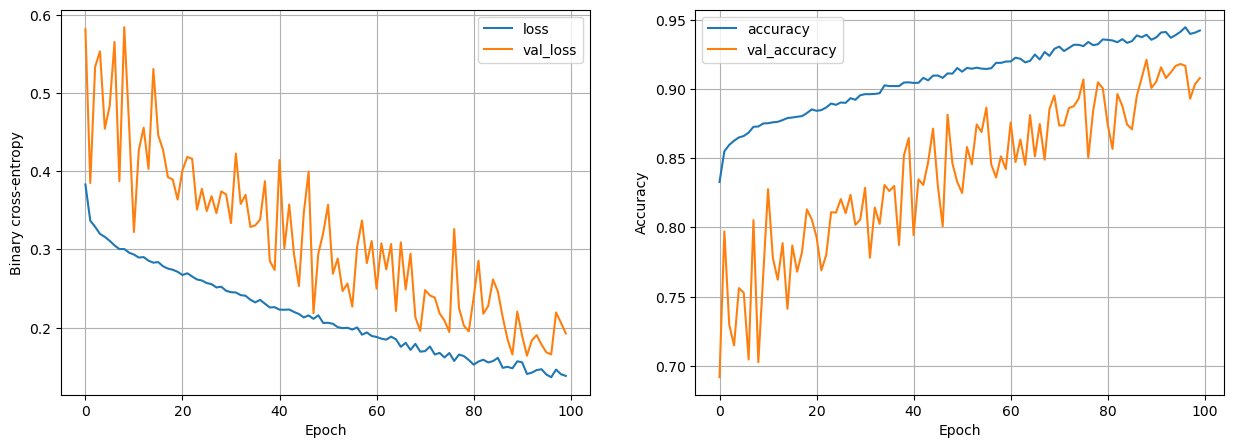

119/119 [==============================] - 0s 543us/step - loss: 0.8105 - accuracy: 0.8533
Training model with 64 nodes, 0 dropout, 0.005 learning rate, 64 batch size


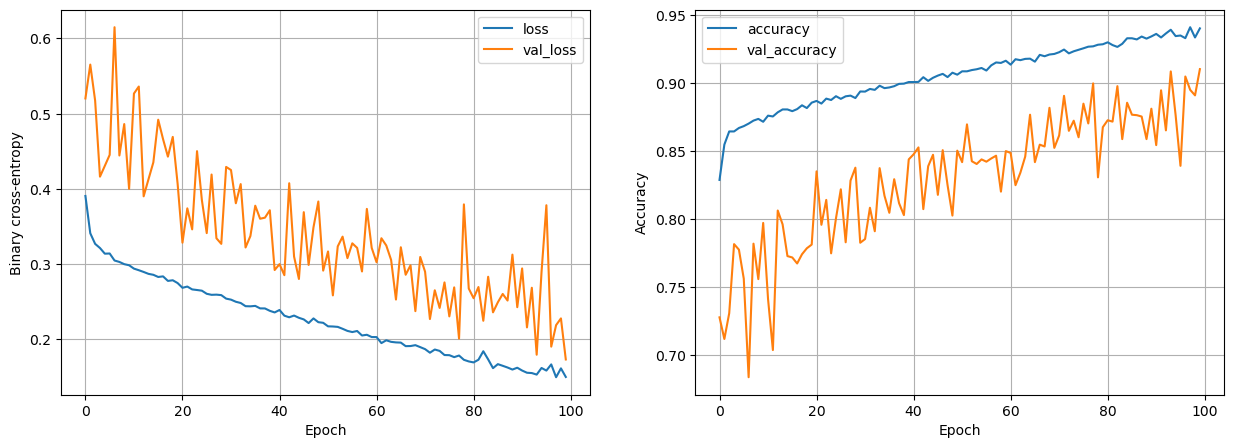

119/119 [==============================] - 0s 478us/step - loss: 0.6637 - accuracy: 0.8365
Training model with 64 nodes, 0 dropout, 0.005 learning rate, 128 batch size


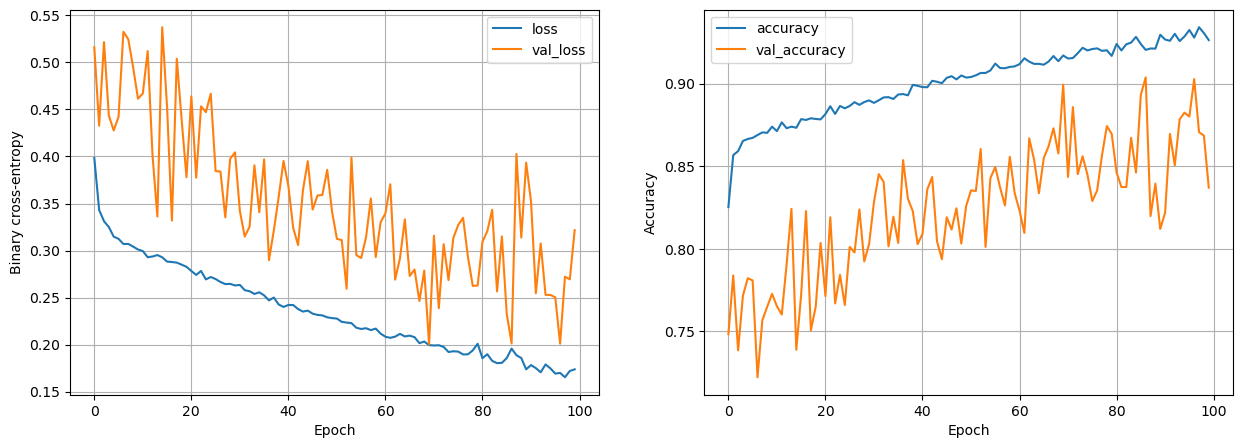

119/119 [==============================] - 0s 568us/step - loss: 0.5460 - accuracy: 0.8491
Training model with 64 nodes, 0 dropout, 0.001 learning rate, 32 batch size


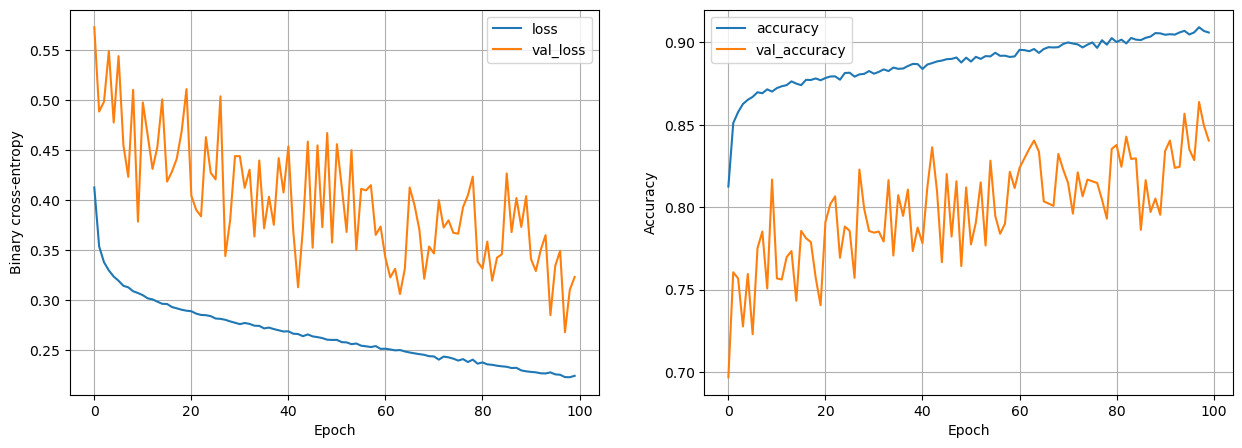

119/119 [==============================] - 0s 513us/step - loss: 0.3753 - accuracy: 0.8559
Training model with 64 nodes, 0 dropout, 0.001 learning rate, 64 batch size


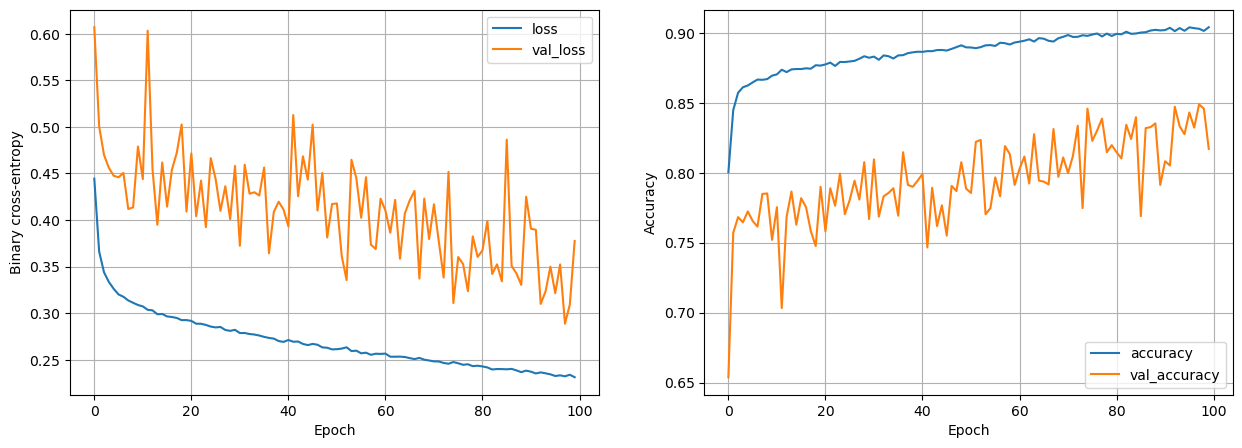

119/119 [==============================] - 0s 523us/step - loss: 0.3746 - accuracy: 0.8583
Training model with 64 nodes, 0 dropout, 0.001 learning rate, 128 batch size


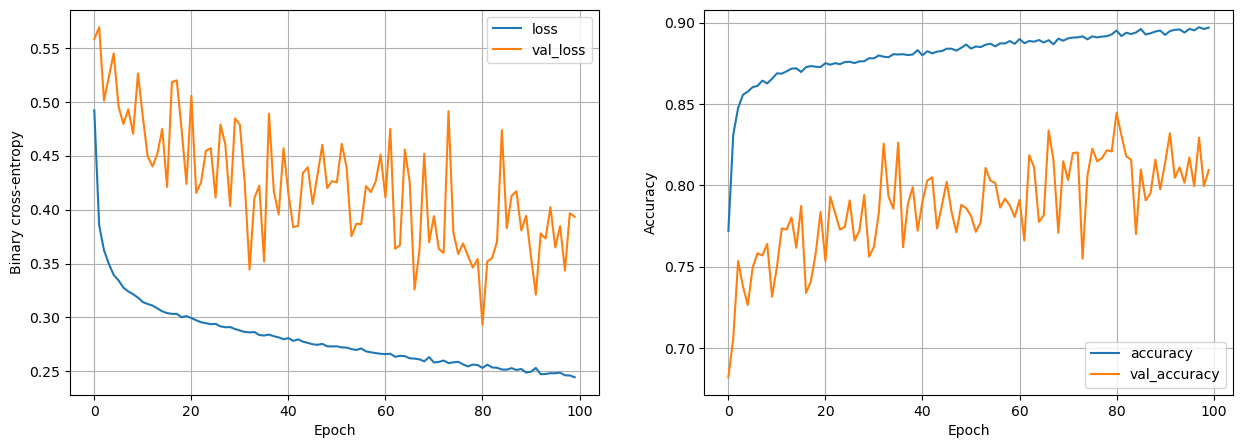

119/119 [==============================] - 0s 406us/step - loss: 0.3537 - accuracy: 0.8628
Training model with 64 nodes, 0.2 dropout, 0.01 learning rate, 32 batch size


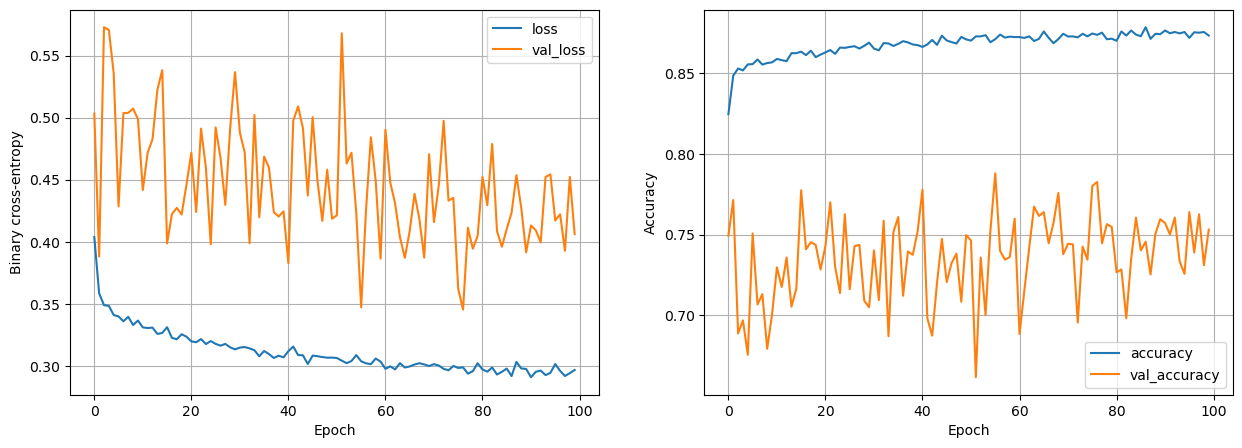

119/119 [==============================] - 0s 537us/step - loss: 0.3582 - accuracy: 0.8636
Training model with 64 nodes, 0.2 dropout, 0.01 learning rate, 64 batch size


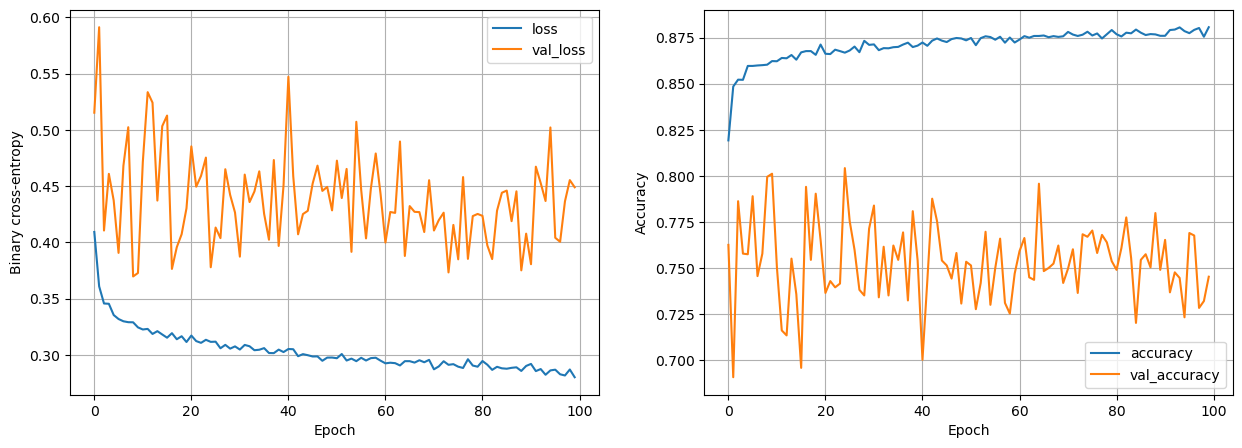

119/119 [==============================] - 0s 287us/step - loss: 0.3470 - accuracy: 0.8599
Training model with 64 nodes, 0.2 dropout, 0.01 learning rate, 128 batch size


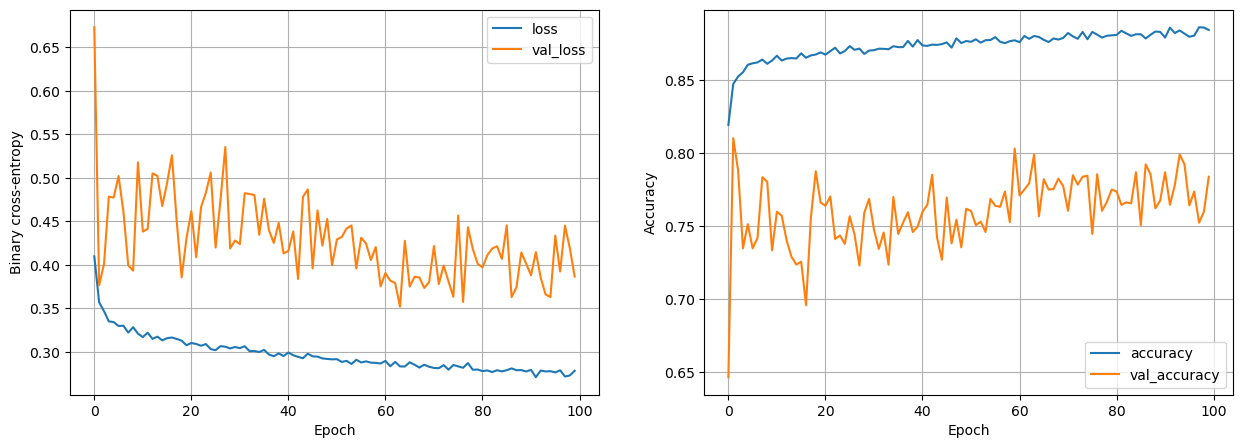

119/119 [==============================] - 0s 616us/step - loss: 0.3482 - accuracy: 0.8667
Training model with 64 nodes, 0.2 dropout, 0.005 learning rate, 32 batch size


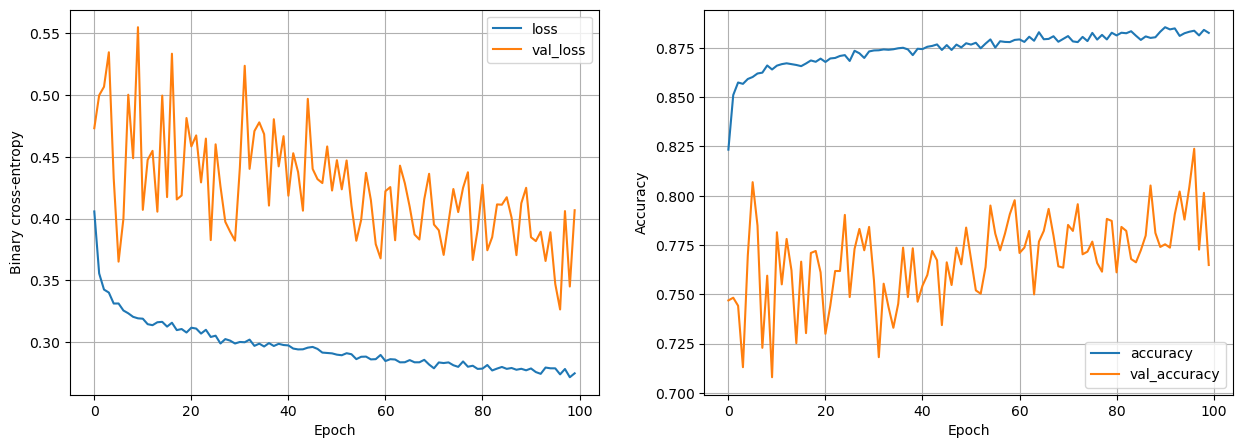

119/119 [==============================] - 0s 642us/step - loss: 0.3415 - accuracy: 0.8638
Training model with 64 nodes, 0.2 dropout, 0.005 learning rate, 64 batch size


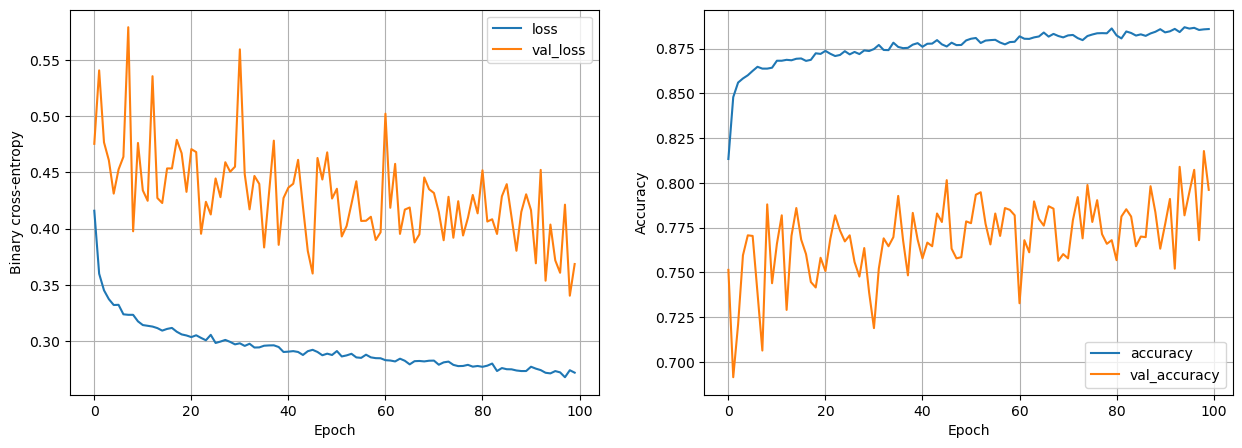

119/119 [==============================] - 0s 481us/step - loss: 0.3354 - accuracy: 0.8725
Training model with 64 nodes, 0.2 dropout, 0.005 learning rate, 128 batch size


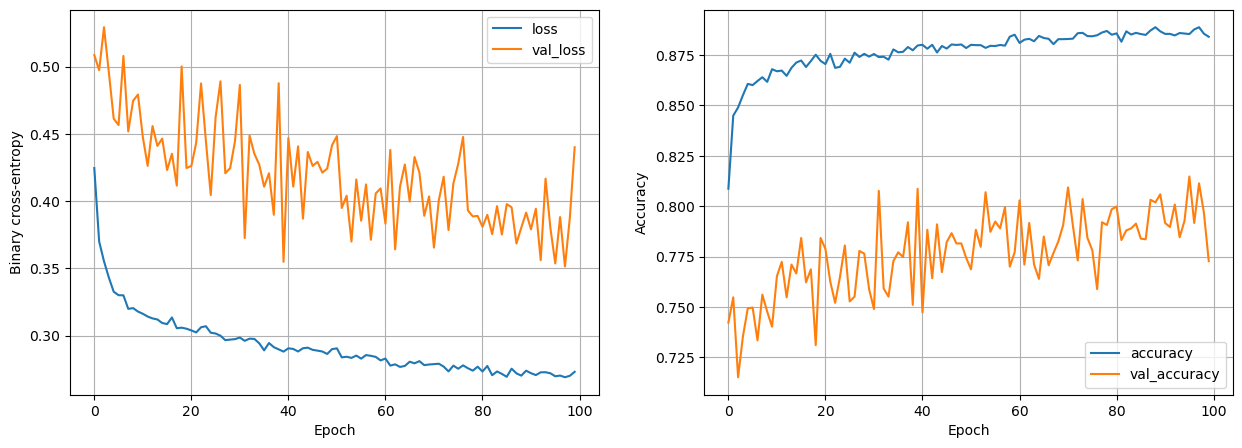

119/119 [==============================] - 0s 578us/step - loss: 0.3268 - accuracy: 0.8691
Training model with 64 nodes, 0.2 dropout, 0.001 learning rate, 32 batch size


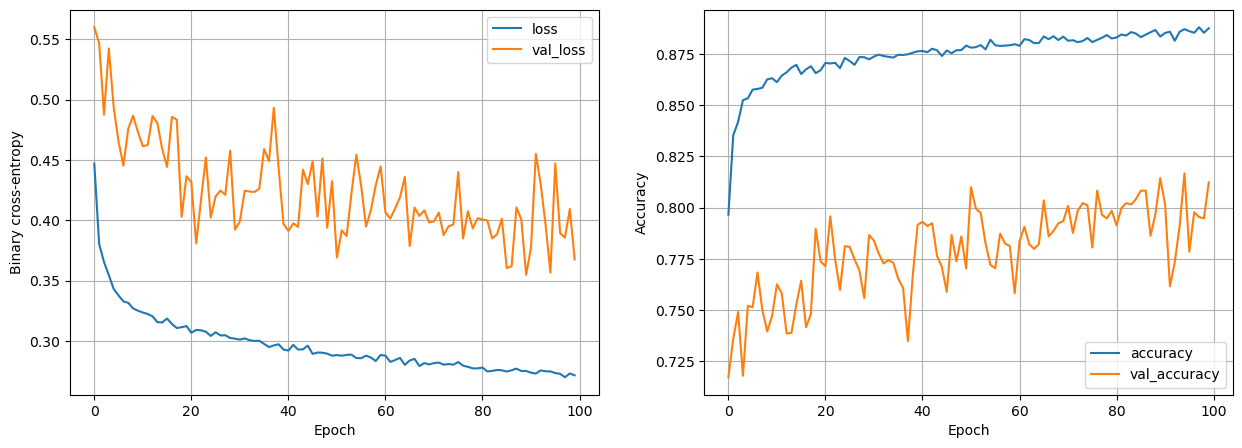

119/119 [==============================] - 0s 337us/step - loss: 0.3245 - accuracy: 0.8730
Training model with 64 nodes, 0.2 dropout, 0.001 learning rate, 64 batch size


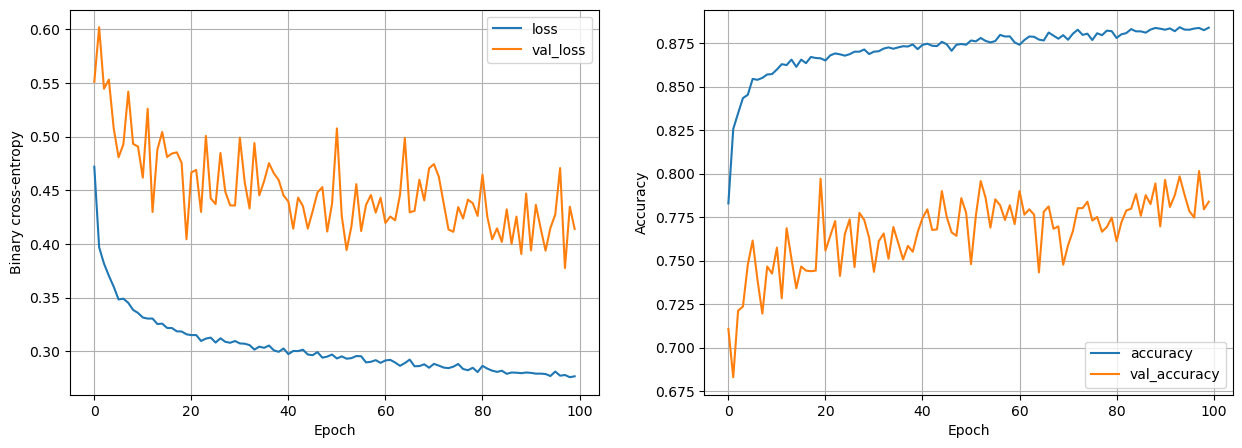

119/119 [==============================] - 0s 466us/step - loss: 0.3271 - accuracy: 0.8693
Training model with 64 nodes, 0.2 dropout, 0.001 learning rate, 128 batch size


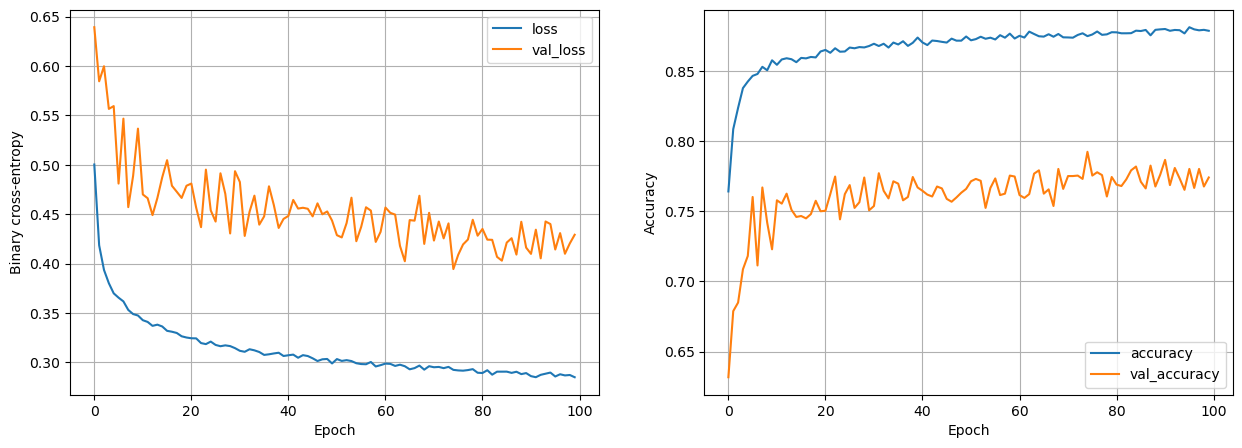

119/119 [==============================] - 0s 514us/step - loss: 0.3277 - accuracy: 0.8686


In [23]:
least_val_loss = 100
least_val_loss_model = None

epochs = 100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"Training model with {num_nodes} nodes, {dropout_prob} dropout, {lr} learning rate, {batch_size} batch size")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_val_loss_model = model

In [24]:
y_pred = least_val_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 263us/step


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1302
           1       0.88      0.94      0.91      2502

    accuracy                           0.88      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804



## Linear Regression
We use it to continous output. Not for clasification
### Techniques to evaluate it
1. Mean Absolute Error (MAE): SUM|(y-yhat)| / n
2. Mean Square Error (MSE): SUM(y-yhat)^2 / n
3. Root Mean Square Error (RMSE): square_root(MSE)
4. R2 - Coef of determination: R2 =  1 - (RSS/TSS), when R2 is closer to 1 is a good predictor

In [4]:
import copy
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Dataset
https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

In [29]:
df2 = pd.read_csv('SeoulBikeData.csv')
df2.head()

Date  Rented Bike Count  Hour  Temperature(C)  Humidity(%)  \
0  1/12/17                254     0            -5.2           37   
1  1/12/17                204     1            -5.5           38   
2  1/12/17                173     2            -6.0           39   
3  1/12/17                107     3            -6.2           40   
4  1/12/17                 78     4            -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(C)  \
0               2.2              2000                     -17.6   
1               0.8              2000                     -17.6   
2               1.0              2000                     -17.7   
3               0.9              2000                     -17.6   
4               2.3              2000                     -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [30]:
df2 = df2.drop(["Date", "Holiday", "Seasons"], axis=1)
df2.head()

Rented Bike Count  Hour  Temperature(C)  Humidity(%)  Wind speed (m/s)  \
0                254     0            -5.2           37               2.2   
1                204     1            -5.5           38               0.8   
2                173     2            -6.0           39               1.0   
3                107     3            -6.2           40               0.9   
4                 78     4            -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(C)  Solar Radiation (MJ/m2)  \
0              2000                     -17.6                      0.0   
1              2000                     -17.6                      0.0   
2              2000                     -17.7                      0.0   
3              2000                     -17.6                      0.0   
4              2000                     -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Functioning Day  
0           0.0            0.0             Yes  
1           0.0            0.0             Yes  
2           0.0            0.0             Yes  
3           0.0            0.0             Yes  
4           0.0            0.0             Yes

In [31]:
df2["Functioning Day"] = df2["Functioning Day"].map({"Yes": 1, "No": 0})
df2 = df2[df2["Hour"] == 12]
df2 = df2.drop(["Hour"], axis=1)

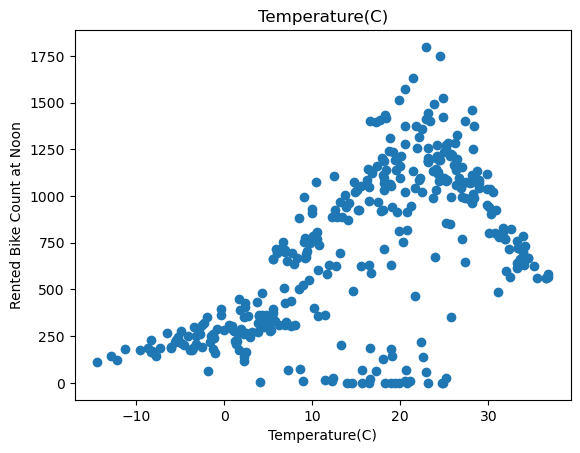

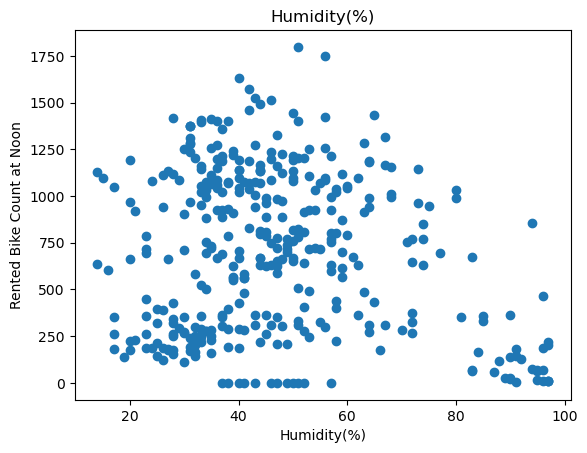

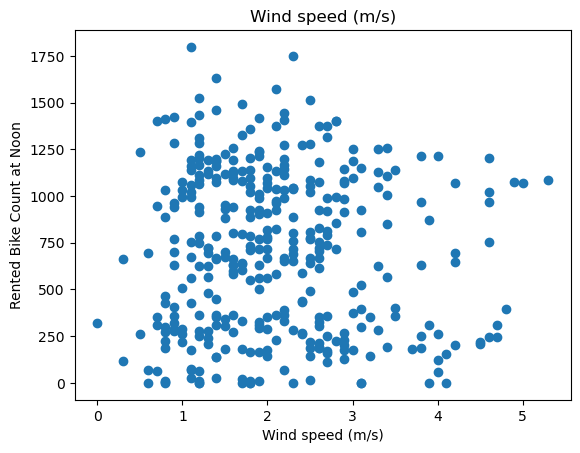

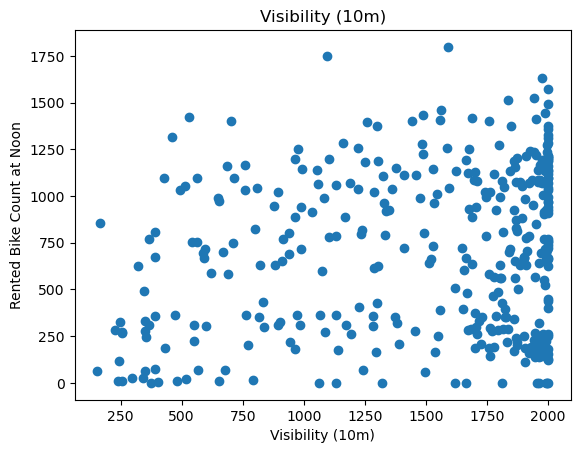

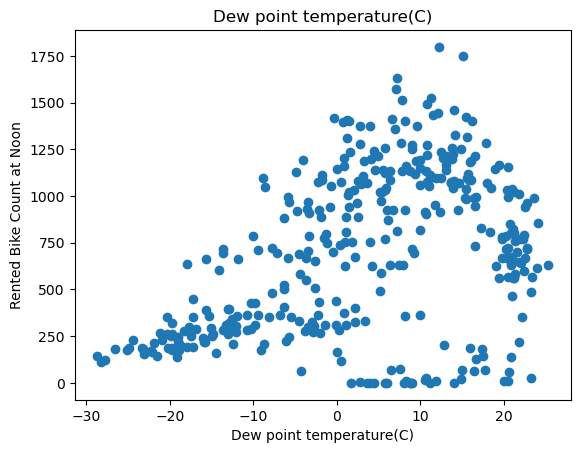

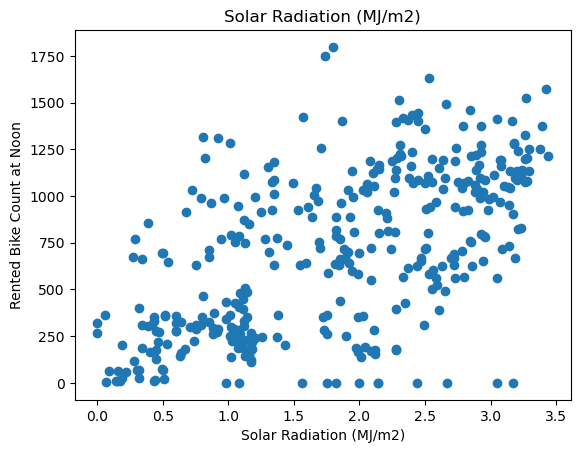

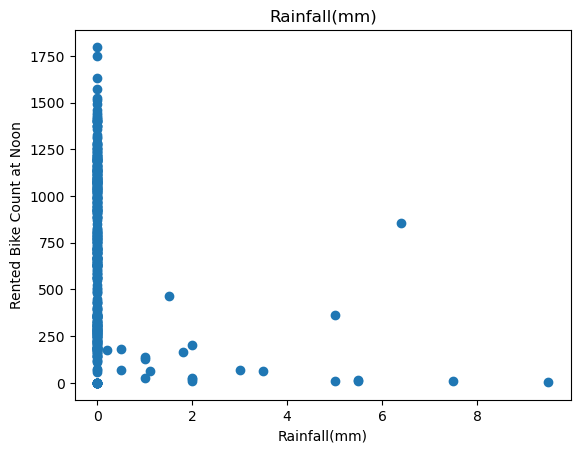

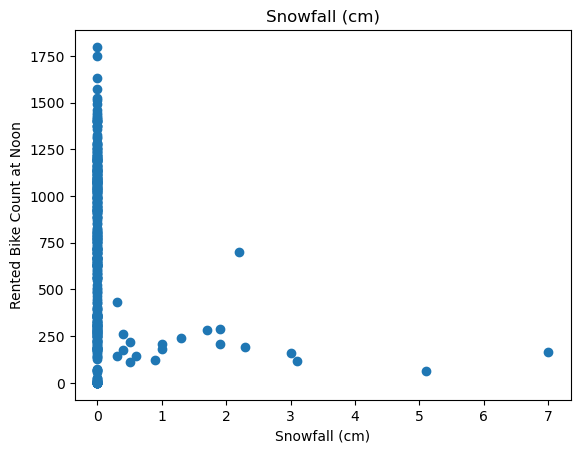

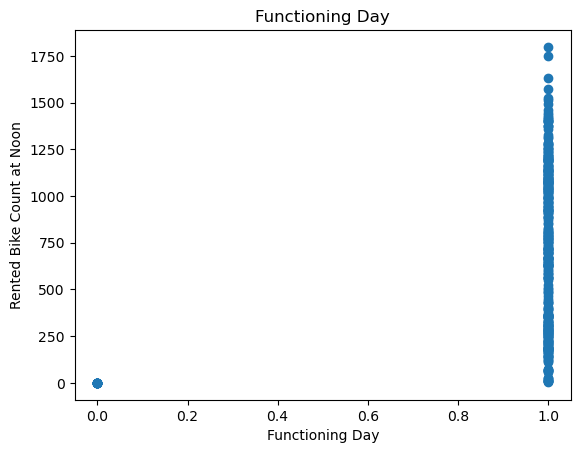

In [32]:
for label in df2.columns[1:]:
    plt.scatter(df2[label], df2["Rented Bike Count"])
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("Rented Bike Count at Noon")
    plt.show()

In [33]:
# Drop the colums that does not help in linear regression
df2 = df2.drop(["Wind speed (m/s)","Visibility (10m)","Functioning Day"], axis=1)
df2.head()

Rented Bike Count  Temperature(C)  Humidity(%)  Dew point temperature(C)  \
12                 449             1.7           23                     -17.2   
36                 479             4.3           41                      -7.8   
60                 333             5.8           85                       3.4   
84                 393            -0.3           38                     -12.9   
108                321            -2.3           25                     -19.7   

     Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
12                      1.11           0.0            0.0  
36                      1.09           0.0            0.0  
60                      0.43           0.0            0.0  
84                      1.11           0.0            0.0  
108                     0.00           0.0            0.0

## Train/valid/test dataset

In [34]:
train, val, test = np.split(df2.sample(frac=1), [int(.6*len(df2)), int(.8*len(df2))])

In [35]:
def get_xy(dataframe, y_label, x_labels = None):
    dataframe = copy.deepcopy(dataframe)
    
    if None:
        X = dataframe[[c for c in dataframe.columns if c != y_label]].values
    else:
        if len(x_labels) == 1:
            X = dataframe[x_labels[0]].values.reshape(-1, 1)    
        else: 
            X = dataframe[x_labels].values
    y = dataframe[y_label].values.reshape(-1, 1)
    data = np.hstack((X, y))           
    return data, X, y

In [36]:
_, X_train, y_train = get_xy(train, "Rented Bike Count", x_labels=["Temperature(C)"])
_, X_valid, y_valid = get_xy(val, "Rented Bike Count", x_labels=["Temperature(C)"])
_, X_test, y_test = get_xy(test, "Rented Bike Count", x_labels=["Temperature(C)"])

In [13]:
temp_reg = LinearRegression()
temp_reg.fit(X_train, y_train)

LinearRegression()

In [14]:
print(temp_reg.coef_, temp_reg.intercept_)

[[21.45287307]] [372.33649426]


In [15]:
temp_reg.score(X_test, y_test)

0.4090287760623953

Text(0, 0.5, 'Rented Bike Count')

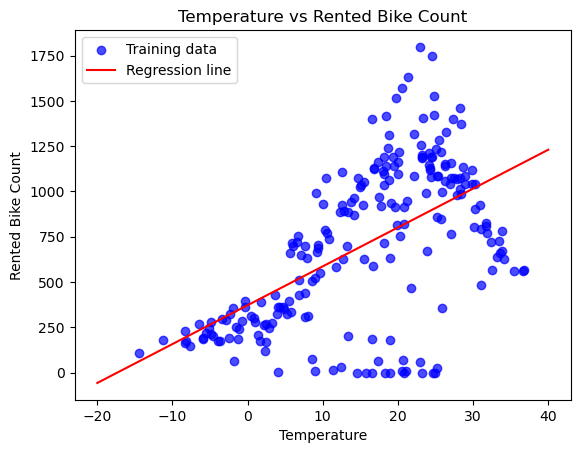

In [16]:
plt.scatter(X_train, y_train, color='blue', alpha=0.7, label="Training data")
x = np.linspace(-20, 40, 100)
plt.plot(x, temp_reg.coef_[0][0] * x + temp_reg.intercept_[0], color='red', label="Regression line")
plt.legend()
plt.title("Temperature vs Rented Bike Count")
plt.xlabel("Temperature")
plt.ylabel("Rented Bike Count")

## Multiple Linear Regression

In [17]:
df2.columns

Index(['Rented Bike Count', 'Temperature(C)', 'Humidity(%)',
       'Dew point temperature(C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)'],
      dtype='object')

In [18]:
_, X_train, y_train = get_xy(train, "Rented Bike Count", x_labels=['Temperature(C)', 'Humidity(%)',
       'Dew point temperature(C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)'])
_, X_valid, y_valid = get_xy(val, "Rented Bike Count", x_labels=['Temperature(C)', 'Humidity(%)',
       'Dew point temperature(C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)'])
_, X_test, y_test = get_xy(test, "Rented Bike Count", x_labels=['Temperature(C)', 'Humidity(%)',
       'Dew point temperature(C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)'])

In [19]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [20]:
reg.score(X_test, y_test)

0.4924291497415859

### Regression with Neural Networks

In [70]:
temp_normalizer = tf.keras.layers.experimental.preprocessing.Normalization(input_shape=(1,),axis=None)
temp_normalizer.adapt(X_train.reshape(-1))

In [71]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [41]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.1), loss='mean_squared_error')

In [42]:
history = temp_nn_model.fit(X_train.reshape(-1), y_train, epochs=1000, validation_data=(X_valid, y_valid), verbose=0)

In [47]:
def plot_history(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
    plt.show()

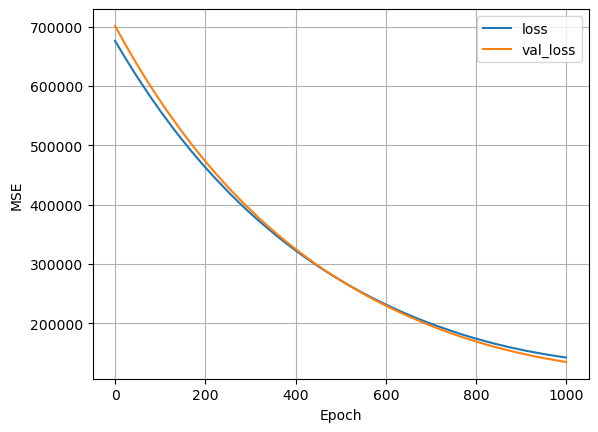

In [48]:
plot_history(history)

4/4 [==============================] - 0s 834us/step


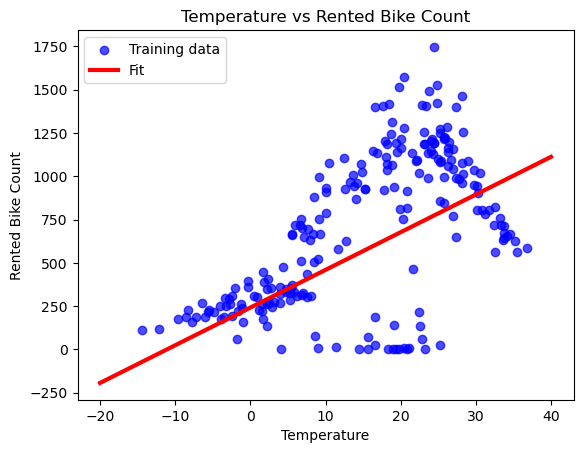

In [51]:
plt.scatter(X_train, y_train, color='blue', alpha=0.7, label="Training data")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), color='red', label="Fit", linewidth=3)
plt.legend()
plt.title("Temperature vs Rented Bike Count")
plt.xlabel("Temperature")
plt.ylabel("Rented Bike Count")
plt.show()

## Neural Net

In [107]:
temp_normalizer = tf.keras.layers.experimental.preprocessing.Normalization(input_shape=(1,),axis=None)
temp_normalizer.adapt(X_train.reshape(-1))

nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1),
])

In [108]:
nn_model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001), loss='mean_squared_error')

In [109]:
history = nn_model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), verbose=0)

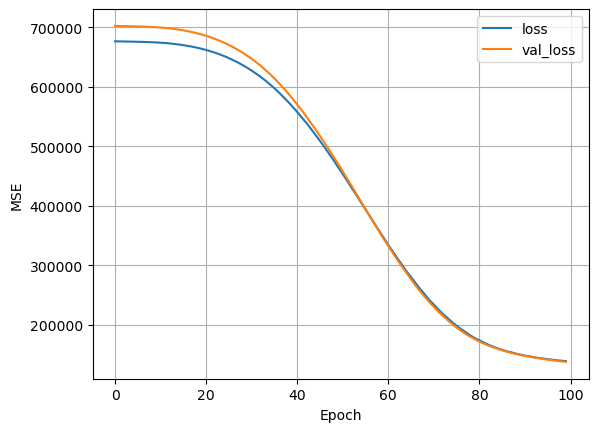

In [110]:
plot_history(history)

4/4 [==============================] - 0s 751us/step


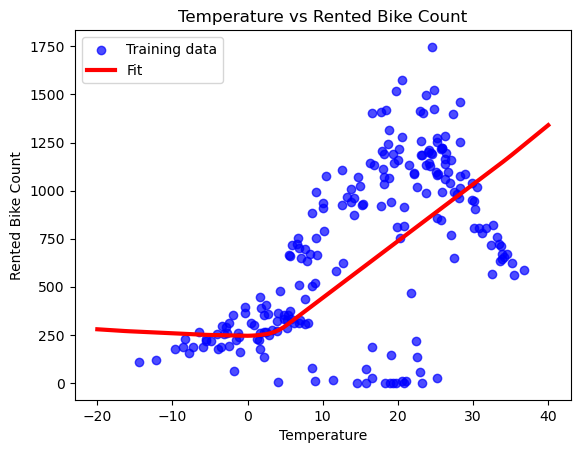

In [111]:
plt.scatter(X_train, y_train, color='blue', alpha=0.7, label="Training data")
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), color='red', label="Fit", linewidth=3)
plt.legend()
plt.title("Temperature vs Rented Bike Count")
plt.xlabel("Temperature")
plt.ylabel("Rented Bike Count")
plt.show()

# Unsupervised Learning

## K-means clustering
Expectation vs maximization
1. Compute k clusters from data. K is predefinied by the data scientist
2. Choose 3 random points to be centroids
3. Assigning points to the closest centroid
4. Compute new centroids and recompute the step 2.

## Principal Component Analysis (PCA)
1. Dimensionality reduction.
2. Component (direction in space) without largest variance.
3. What it looks to? Minimize projection residuals. Maximize variance.

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
cols = ["area","perimeter","compactness","length","width","asymmetry","length_groove","class"]
seeds = pd.read_csv('seeds_dataset.txt', header=None, names=cols, sep='\s+')

In [117]:
seeds.head()

area  perimeter  compactness  length  width  asymmetry  length_groove  \
0  15.26      14.84       0.8710   5.763  3.312      2.221          5.220   
1  14.88      14.57       0.8811   5.554  3.333      1.018          4.956   
2  14.29      14.09       0.9050   5.291  3.337      2.699          4.825   
3  13.84      13.94       0.8955   5.324  3.379      2.259          4.805   
4  16.14      14.99       0.9034   5.658  3.562      1.355          5.175   

   class  
0      1  
1      1  
2      1  
3      1  
4      1

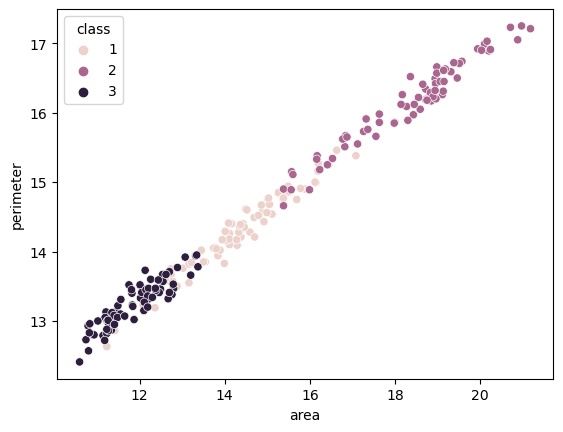

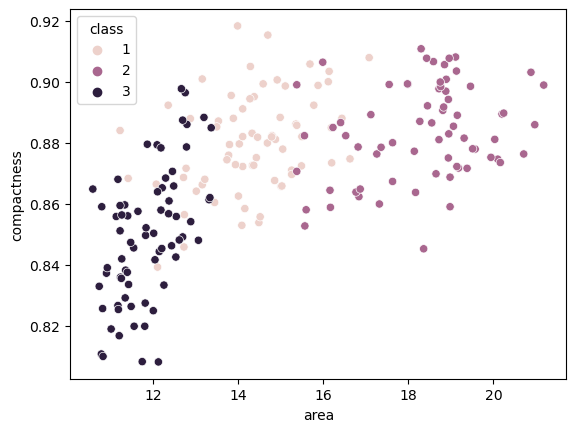

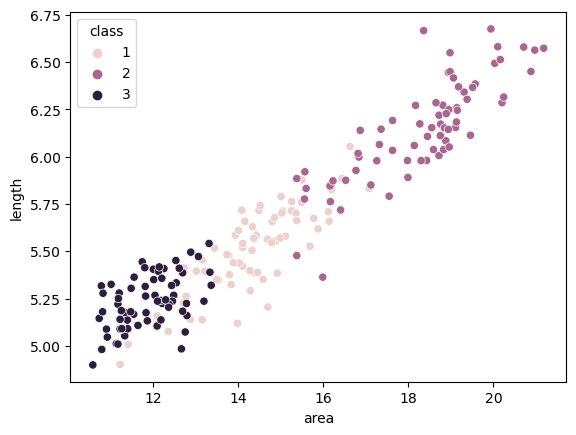

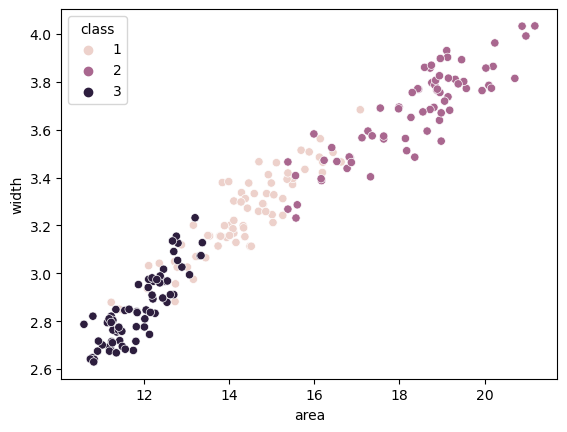

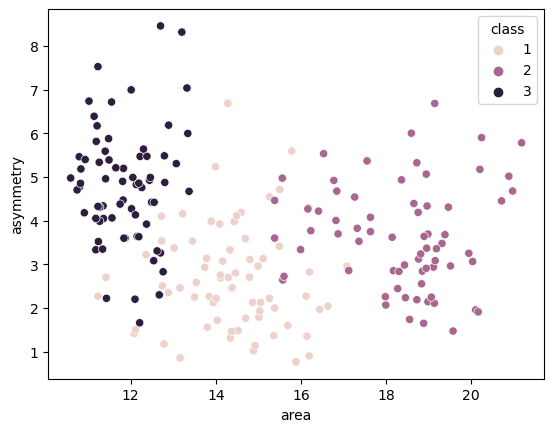

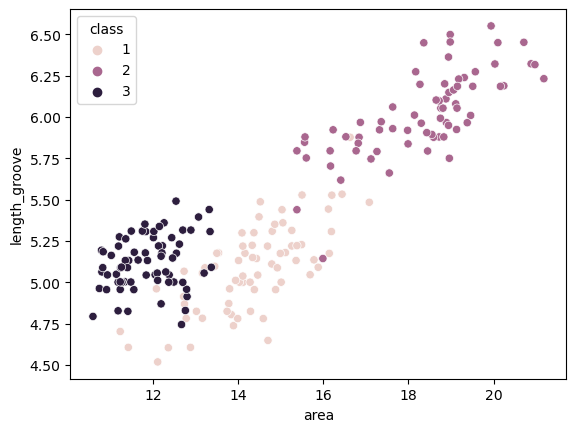

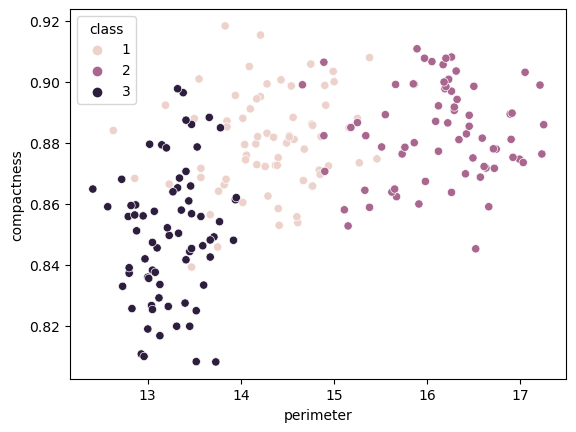

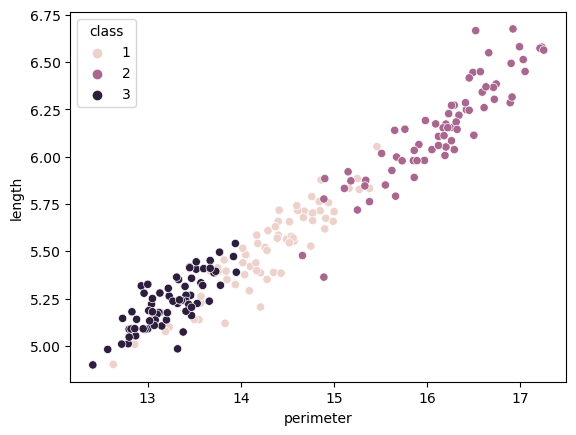

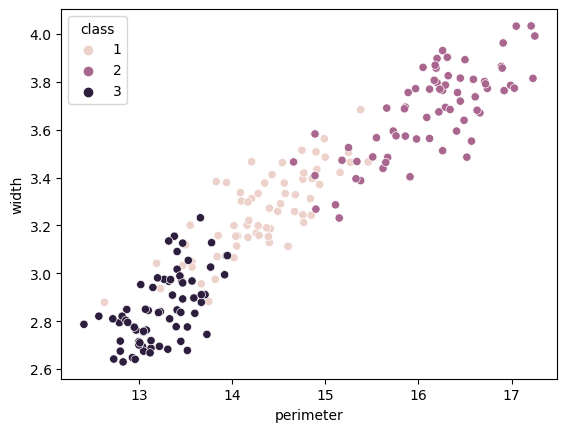

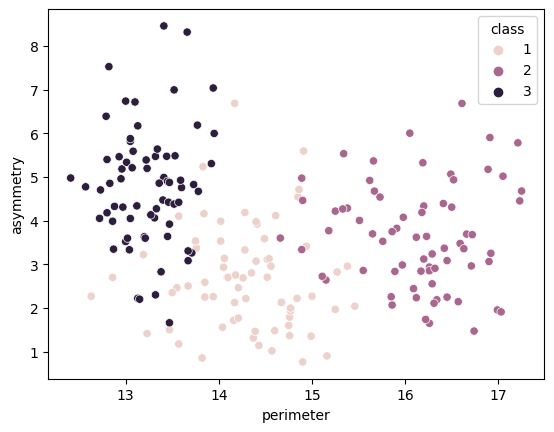

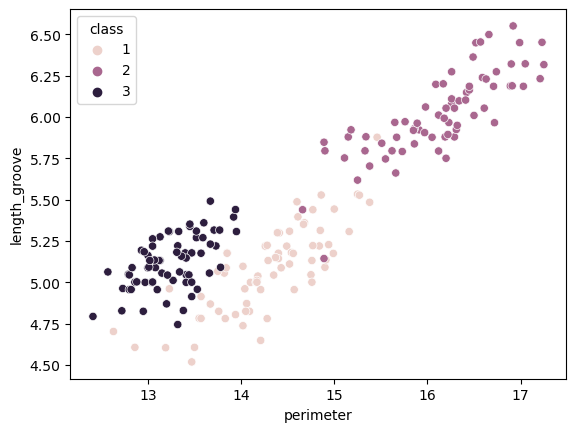

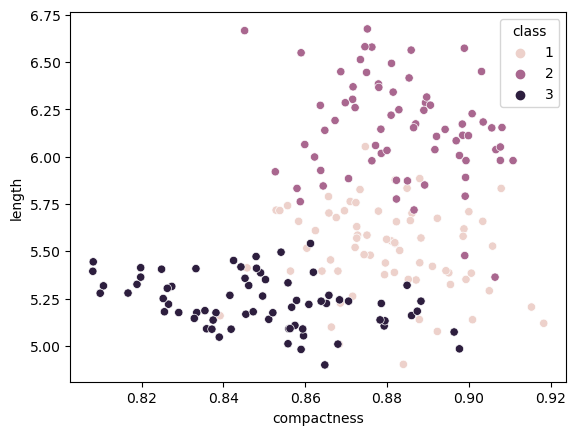

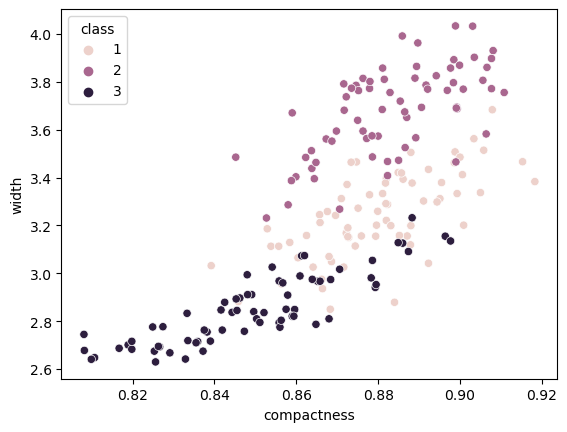

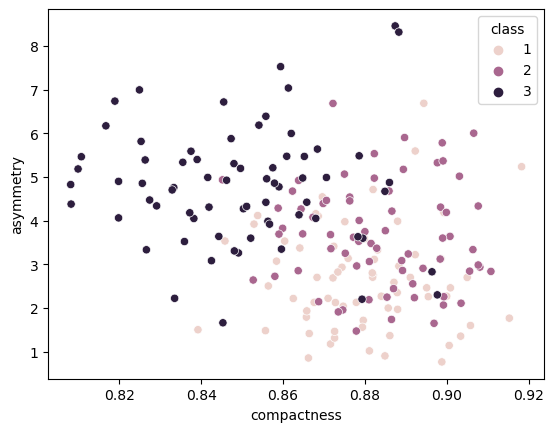

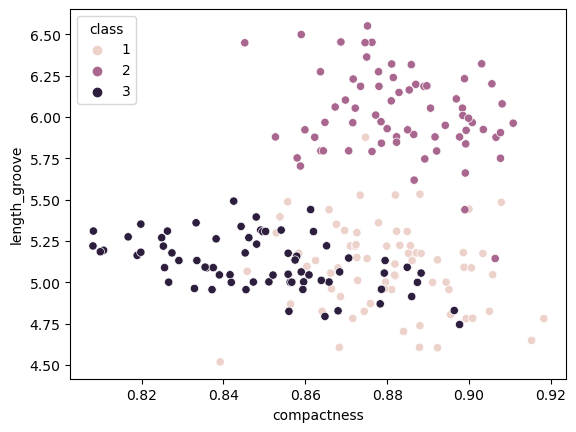

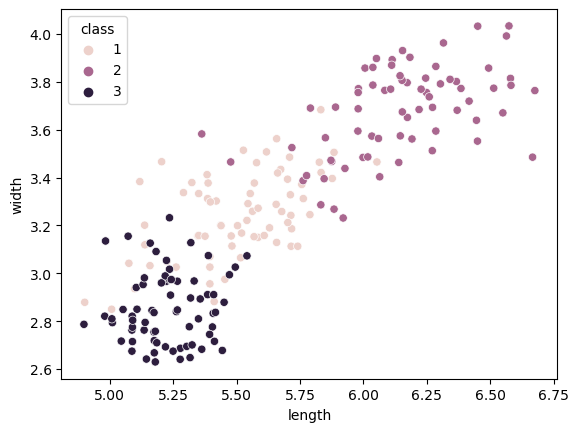

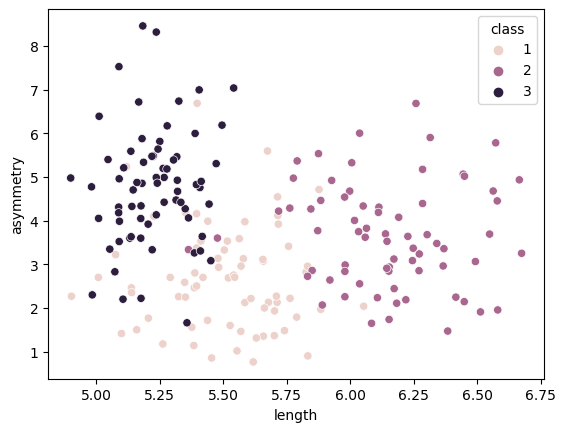

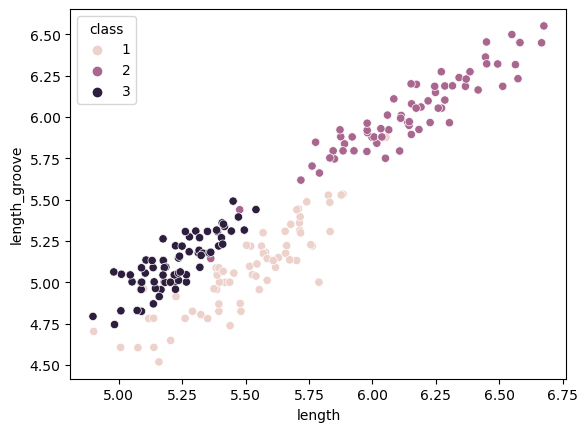

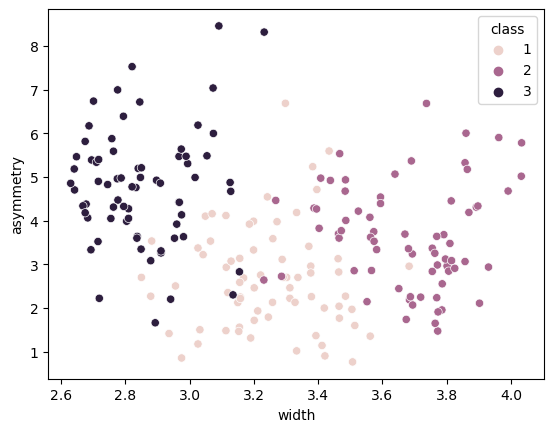

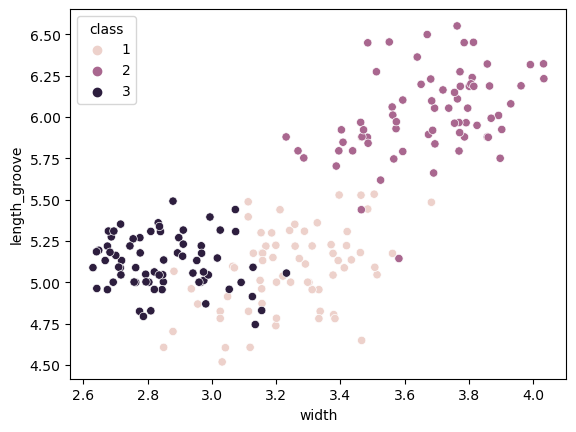

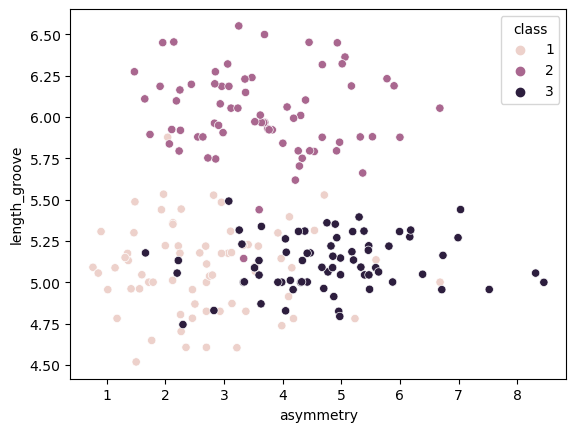

In [118]:
for i in range(len(cols)-1):
    for j in range(i+1, len(cols)-1):
        sns.scatterplot(x=cols[i], y=cols[j], hue="class", data=seeds)
        plt.show()

## Clustering

In [119]:
from sklearn.cluster import KMeans

In [120]:
x = "perimeter"
y = "asymmetry"

X = seeds[[x, y]].values

In [121]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

/Users/omargonzales/tensorflow-peopl/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [122]:
clusters = kmeans.labels_

In [123]:
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int32)

In [124]:
seeds["class"].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [126]:
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1,1))), columns=[x, y, "class"])

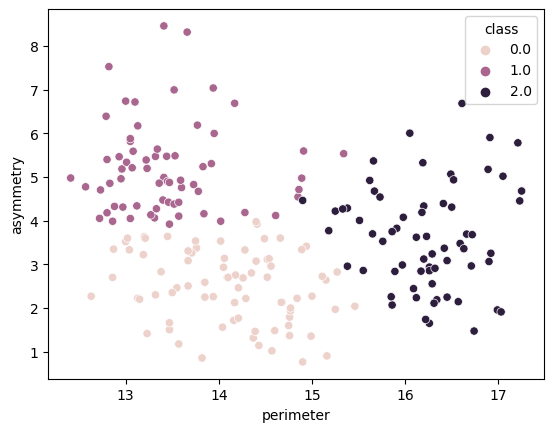

In [128]:
#K means classes
sns.scatterplot(x=x, y=y, hue="class", data=cluster_df)
plt.show()

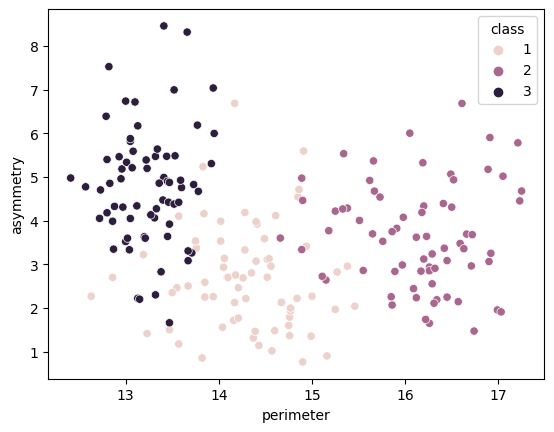

In [129]:
#Original classes
sns.scatterplot(x=x, y=y, hue="class", data=seeds)
plt.show()

## Higher Dimensions

In [130]:
X = seeds[cols[:-1]].values

In [132]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clusters_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1,1))), columns=seeds.columns)

/Users/omargonzales/tensorflow-peopl/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


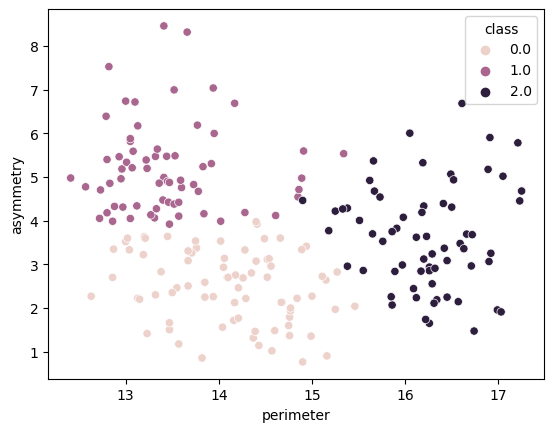

In [133]:
#K means classes
sns.scatterplot(x=x, y=y, hue="class", data=cluster_df)
plt.show()

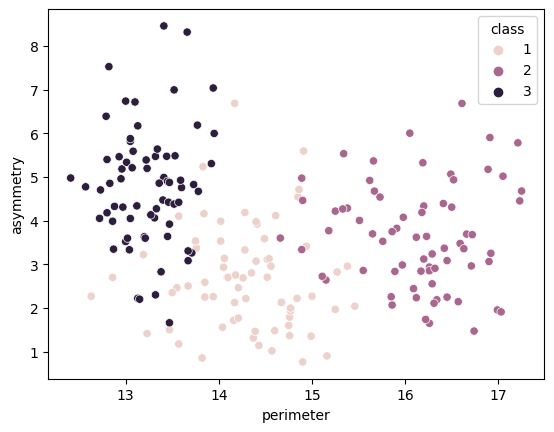

In [134]:
#Original classes
sns.scatterplot(x=x, y=y, hue="class", data=seeds)
plt.show()

## PCA

In [135]:
from sklearn.decomposition import PCA

In [136]:
pca = PCA(n_components=2)
transformed_x = pca.fit_transform(X)

In [137]:
X.shape, transformed_x.shape

((210, 7), (210, 2))

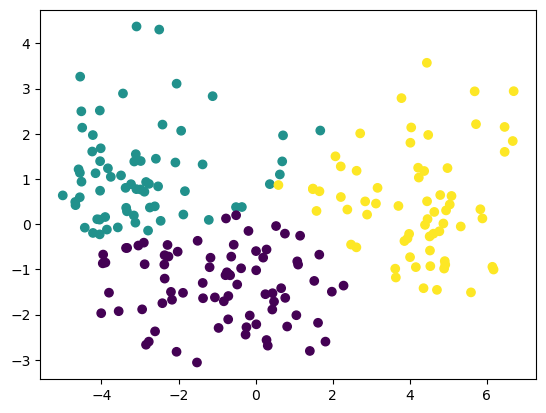

In [138]:
plt.scatter(transformed_x[:, 0], transformed_x[:, 1], c=clusters)
plt.show()